# JC3503 Assignment 2024-2025 

## Movies

---

Student Name: [YONGFENG LIN]

Student Email: [u17yl22@abdn.ac.uk]

Student ID: [50087310]

---




<u>**Date due: Friday 30th May, 2025, at 23:59 (UTC+8; Beijing time)**</u>


You should use markdown to explain the different steps of your analysis, and to add your own interpretation of what that analysis shows. 

Your notebook should alternate between markdown and analysis code. However, you should also use code comments, where appropriate, to explain your process.

**Note that all comments and markdown should be in English.**

### Structure of all：
* 1. data loading
  2. data overview 
  3. initial data cleaning  
  4. EDA
  5. data preprocessing and data mining  
  6. Conclusions

### Import necessary library

In [69]:
# Add all pre-requisites and libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import ast
from scipy.stats import chi2_contingency
from itertools import combinations
from scipy.stats import kruskal
# Apply Seaborn's 'default' theme for visualisations
sns.set_theme()

# Make sure that our plots are visualised in jupyter
%matplotlib inline

# DATA LOADING
*  Gathering the data from Dataset and investegate it trying to understand more details about it. (By using info(), head())

In [72]:
# Import the data
df = pd.read_csv("movies.csv", low_memory=False)

# DATA OVERVIEW
#### Using info() and head() to have a first step understanding

*  Assessing data to identify any issues with data types, structure, or quality.(attirbutes,null values)

**Findings:**
    
    1. There are 20 columns and 4803 rows, which means that there are 4803 movies, each movie is described by 20 attributes.(raw data, may has duplicated rows)
    2. Data type(20) includes: int64(3), object(4), float64(13)

In [74]:
#See the information and first 5 rows of data
#inside info(), I can see the shape, data types, number of null values of dataframe
df.info()
#from head(), I can simply go through the values and strcutures inside dataframe 
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# INITIAL DATA CLEANING 
* Initially clean the data by changing data types, replacing values, removing unnecessary data, and modifying data sets for easy and quick analysis. I divide the task of cleaning data into two parts, one is to clean the numerical type, and the other is to clean the object type.**

**There are many types of messy data：**
 * Erroneous values (e.g. spelling mistakes)
 * Duplicated rows
 * Partial data (e.g. abandoned questionnaires)
 * Missing val (delete the rows if not interesting/insert the mean,median,or mode/copy from similar rows)(could be "None","NaN","","{}")
 * Extreme outliers

### Checking distribution of column types

In [77]:
#Get all object type column names
object_columns = df.select_dtypes(include='object').columns
print("Object types:", list(object_columns))

#Get all Int type column names
int_columns = df.select_dtypes(include='int').columns
print("Int types:", list(int_columns))

#Get all float type column names
float_columns = df.select_dtypes(include='float').columns
print("Float types:", list(float_columns))
             

Object types: ['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title']
Int types: ['budget', 'id', 'revenue', 'vote_count']
Float types: ['popularity', 'runtime', 'vote_average']


### Assessing and cleaning numerical data



**Below will do these step by step**


#### Checking the erroneou values and null values of numerical data
**Findings:**
* Some of numerical attirbutes have the values of 0, which are likely to be implicit missing values(e.g. budget value is 0). As a reslut, it is necessary to see the distribution of each numerical types. In order to display more intuitive, here I use

In [84]:
#df[].value_counts()  see if there is erroneous values or null values


for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False) )
#see the value counts of each column, and find that some runtime values are 0, some budget values are 0.





Column: budget
budget
0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: count, Length: 436, dtype: int64

Column: genres
genres
[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                       

### Define a method that can display the distribution of numerical data automaticallly.

In [87]:
def plot_numerical_histograms(df, exclude_cols=None, n_cols=3):
    """
    Plot histograms for numerical columns in a DataFrame (excluding specified columns),
    with the percentage of zero values shown in the title.

    Parameters:
    - df: pandas DataFrame, the input dataset.
    - exclude_cols: list of column names to exclude from plotting (e.g., ['id']).
    - n_cols: int, number of plots per row (default is 3).
    """
    if exclude_cols is None:
        exclude_cols = []

    # Select numerical columns and exclude specified ones
    numeri_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeri_cols = [col for col in numeri_cols if col not in exclude_cols]

    # Determine the number of rows needed for the subplot layout
    n_rows = -(-len(numeri_cols) // n_cols)  # Equivalent to math.ceil

    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    # Plot histograms for each numerical column
    for i, col in enumerate(numeri_cols):
        sns.histplot(data=df, x=col, ax=axes[i], kde=True)
        zero_count = (df[col] == 0).sum()             # Count of zero values
        total_count = df[col].notnull().sum()         # Count of non-null values
        zero_percent = 100 * zero_count / total_count
        axes[i].set_title(f"{col} (0: {zero_percent:.2f}%)")

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Checking the distribution of numerical columns and finding the implicit missing values

**Analysis --- Combining the results from the plots and the 'zero percent:**
* **Budget** --- Since its 'zero precent' is 21.59%, I treat the value of 0 as implicit missing values
* **Popularity** --- It is a Right-skewed distribution, with just 1 popularity value is 0, however. If the value of 0 is reasonable, it should account for a large proportion. As a result, I treat it as implicit missing value.
* **Revenue** --- From the distribution point of view, if the number of zero values ​​is less than 500, then I can consider it reasonable. However, 1400 zero values ​​are enough for me to consider them as implicit missing values.
* **Runtime** --- It is easy to notice from the plot that the values of 0 are implicit missing values.
* **vote_average** and **vote_count** --- Combining images and common sense, in order to facilitate data processing, I decided to treat the zero values ​​here as missing values




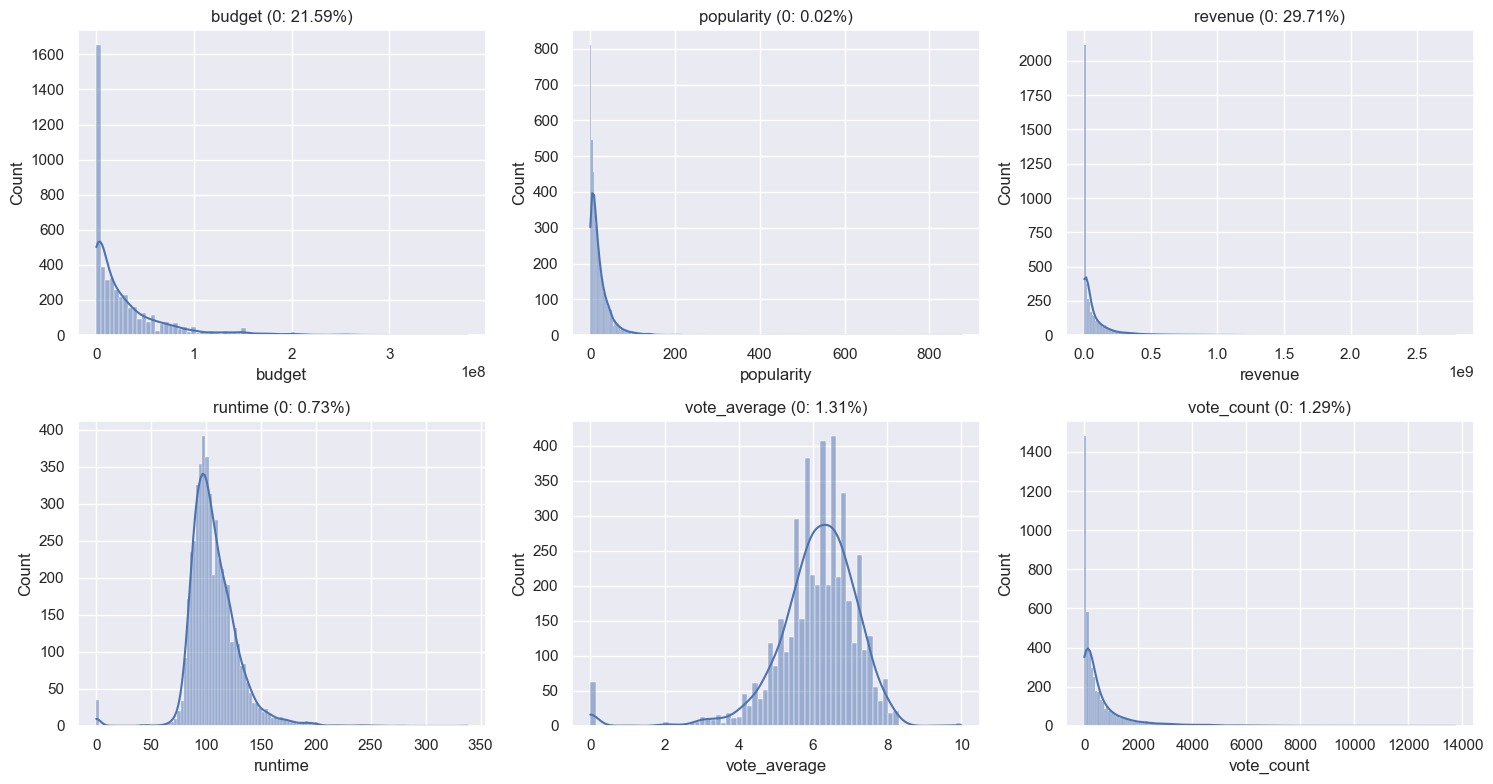

In [90]:
plot_numerical_histograms(df, exclude_cols=['id'], n_cols=3)

### Initial cleaning numerical data
* setting implicit missing values above to NaN
* Setting the erroneou values and null values to NaN
* replace the outliers of numerical data ，by using lower and upper

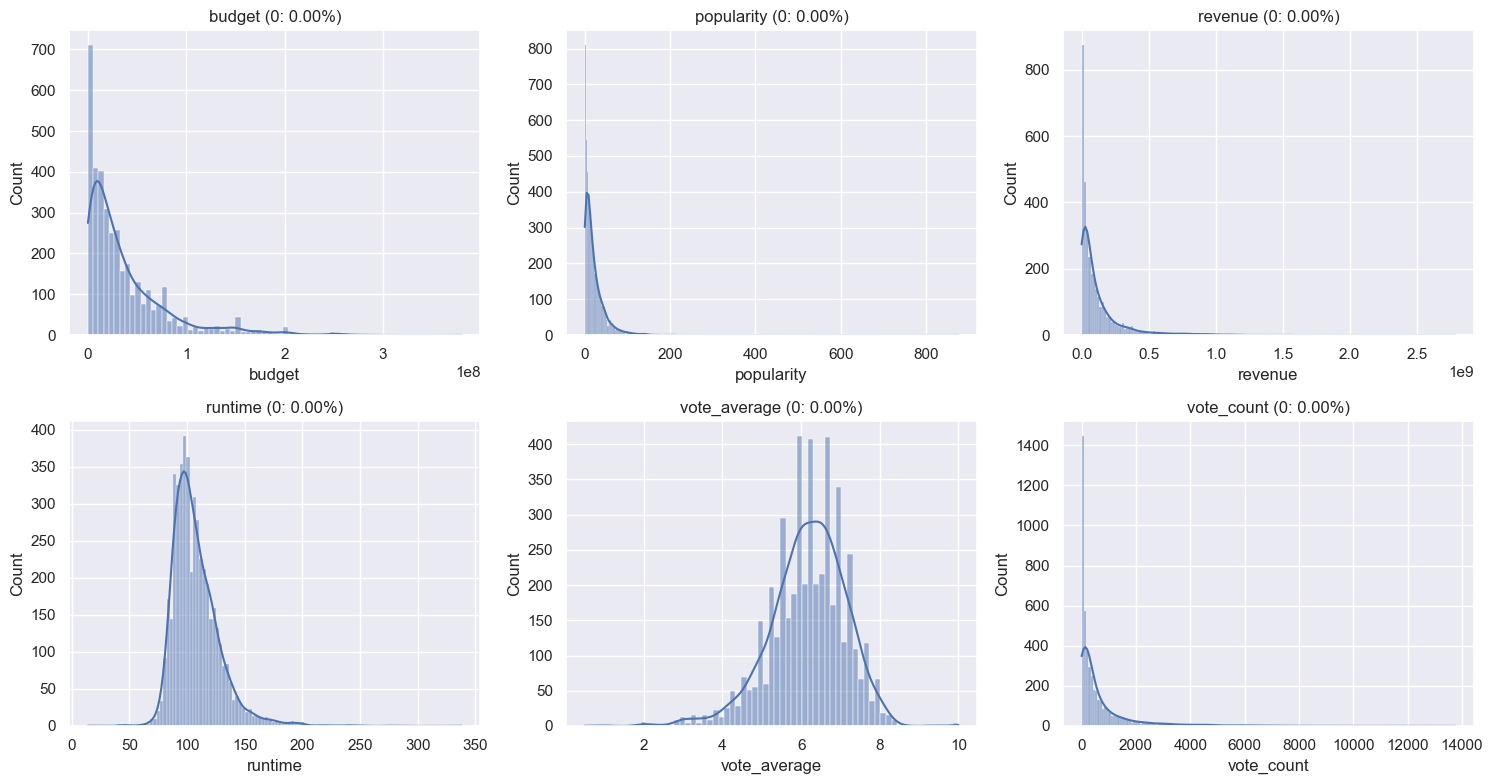

In [93]:

# Select numerical columns and exclude specified ones
#numeri_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeri_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

#copy the data frame
df_copy = df.copy()
#setting implicit missing values above to NaN:
df_copy[numeri_cols] = df_copy[numeri_cols].replace(0, np.nan)



#Setting the erroneou values and null values to NaN

df_copy.replace(["None", "", "{}", "[]"], np.nan, inplace=True)
#drop duplicated rows
df_copy.drop_duplicates(inplace=True)
#see the distribtuion of NaN values
df_copy.isnull().sum()








#replace the outliers of numerical data ，by using lower and upper(quantile 0.01, and quantile 0.99)
for col in numeri_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)



plot_numerical_histograms(df_copy, exclude_cols=['id'], n_cols=3)

### Display columns of object types

In [96]:
#Get all object type column names
object_columns = df_copy.select_dtypes(include='object').columns
print("Object types:", list(object_columns))

Object types: ['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title']


## Initial cleaning object data
In this section, we perform data cleaning and transformation in object data

### 1. Droi Irrelevanc Columns
The following columns are removed as they contain plain text or URL data that are not useful for model since I did not use NLP for this tasking:
- `homepage`
- `original_title`
- `overview`
- `tagline`
- `title`

### 2. Pcrse JSON Columns
Several columns contain JSON-formatted data. We extract useful features from them:

- `genres` →  
  - `main_genres`: the first genre listed  
  - `count_genres`: the number of genres  

- `keywords` →  
  - `main_keywords`: the first keyword listed  
  - `count_keywords`: the number of keywords  

- `production_companies` →  
  - `main_production_companies`: the first production company listed  
  - `count_production_companies`: the number of production companies  

- `production_countries` →  
  - `main_production_countries`: the first production country listed  
  - `count_production_countries`: the number of production countries  

- `spoken_languages` →  
  - `main_spoken_languages`: the first spoken language listed  
 e number of spoken languages - `count_spoken_languages`: th


To reduce cardinality and improve model performance, we apply an automatic category conversion:  
- If the number of unique values in `main_<col>` is less than 50, it is directly converted to a categorical variable.  
- Otherwise, we keep only the top 49 most frequent categories, and merge all other rare categories into a new categoryp called `"Other"
### 3. Date Processing
- Convert the type of `release_date` to `datetime`
  
- Then drop the original `release_date` column.en drop the original `release_datc` column.

### 4. Categorical Conversion
- Convert the following columns to categorical data types for later encoding or modeling:
  - `original_language`
  - `status`

### Define a method that can automatically perform 4 processes above.

In [100]:
def full_clean_movie_data(df):
    # Step 1: These five columns are unnecessary for my task. Delete them from dataframe.
    drop_cols = ['homepage', 'original_title', 'overview', 'tagline', 'title']
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    # Step 2: Parse the object column like JSON and extract the main element and quantity, and automatically determine whether to convert to category
    def parse_json_column(col, key='name', category_threshold=50):
        # Convert JSON-like string to Python object (list of dicts) if not null
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
        # Extract the first element's value (usually a dict with a 'name' key), or fallback to raw string/Unknown
        df[f'main_{col}'] = df[col].apply(
            lambda lst: lst[0][key] if lst and isinstance(lst[0], dict) and key in lst[0] else (lst[0] if lst else 'Unknown')
        )
        # Count the number of elements in the list
        df[f'count_{col}'] = df[col].apply(len)
        # Drop the original JSON column to avoid redundancy
        df.drop(columns=[col], inplace=True)
        # If the unique value of the main element is smaller than 50, it is automatically converted to category
        if df[f'main_{col}'].nunique() < category_threshold:
            df[f'main_{col}'] = df[f'main_{col}'].astype('category')
        else:
        # More than threshold unique values: keep top (threshold-1) frequent, others => 'Other'
            top_n = category_threshold - 1
            top_categories = df[f'main_{col}'].value_counts().nlargest(top_n).index
            df[f'main_{col}'] = df[f'main_{col}'].apply(lambda x: x if x in top_categories else 'Other')
            df[f'main_{col}'] = df[f'main_{col}'].astype('category')
    # List of JSON-like columns to process
    json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
    # Apply the parser to each column in the list
    for col in json_columns:
        if col in df.columns:
            parse_json_column(col)

   


    
    # Step 3: convert type of release_date into datetime
    if 'release_date' in df.columns:
        df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
        
        

    # Step 4:  transform riginal_language and status to category type
    for col in ['original_language', 'status']:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # return the number of unique value 
    print("the number of unique value（object/category columns）：")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"{col}: {df[col].nunique()}")

    return df






### Perform the function above and see the cleaned dataframe
* I named the cleaned dataframe here -- df_cleaned

In [103]:

#copy the data frame
df_copy1 = df_copy.copy()



# apply function
df_cleaned = full_clean_movie_data(df_copy1)

# check the results
print(df_cleaned.head())
print(df_cleaned.info())


the number of unique value（object/category columns）：
original_language: 37
status: 3
main_genres: 21
main_keywords: 50
main_production_companies: 50
main_production_countries: 50
main_spoken_languages: 48
        budget      id original_language  popularity release_date  \
0  237000000.0   19995                en  150.437577   2009-12-10   
1  300000000.0     285                en  139.082615   2007-05-19   
2  245000000.0  206647                en  107.376788   2015-10-26   
3  250000000.0   49026                en  112.312950   2012-07-16   
4  260000000.0   49529                en   43.926995   2012-03-07   

        revenue  runtime    status  vote_average  vote_count main_genres  \
0  2.787965e+09    162.0  Released           7.2     11800.0      Action   
1  9.610000e+08    169.0  Released           6.9      4500.0   Adventure   
2  8.806746e+08    148.0  Released           6.3      4466.0      Action   
3  1.084939e+09    165.0  Released           7.6      9106.0      Action   


# Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand the structure and patterns in the data, and to identify potential relationships between variables that may influence the target.

---

### 1. Variable Distribution

#### 1.1 Continuous Variables
We examine the distribution of numerical variables using **hisoxplots** to detectoutliers, and general shape.

- `budget`
- `popularity`
- `revenue`
- `runtime`
- `vote_average`
- `release_month`

These plots help identify central tendency, spread, and anomalies.

#### 1.2 Categorical Variables
We use **bar plots** and **frequency tables** to show the distribution of categories in:

- `original_language`
- `status`
- `main_genres`
- `main_keywords`
- `main_production_companies`
- `main_production_countries`
- `main_spoken_languages`

To avoid sparsity, rare categories are grouped as `"Other"`.

---

### 2. Relationships Between Variables

#### 2.1 Continuous vs Continuous
We analyze linear correlations between numerical variables or **others** according to different preconditions. using:
- **Pearson correlation matrix**
- **Heatmap** for visualizing strengths and directions
- **Scatter plots** for selected variable pairs, suchcount - `burevenuerevenue`
  - `vote_average` vs `vote_count`
  - `popularity` vs `revenue`

#### 2.2 Categorical vs Categorical
We explore co-occurrence patterns or relationships between categorical variables using:
- **Cross-tabulations**
- **Stacked bar charts**

Examples:
- `status` vs `original_language`
- `main_genres` vs `main_production_countries`

#### 2.3 Categorical vs Continuous
We investigate how continuous variables vary across categories using:
- **Boxplots**
- **Violin plots**
- **Grouped bar charts**

Examples:
- `revenue` by `main_genres`
- `vote_average` by `status`
- `runtime` by `main_production_companies`

---

### 3. Time-Based Analysis

We analyze how key variables vary over time using `release_date` 

- Number of movies released per year
- Trends in `budget`, `revenue`, `vote_average` over time
- Genre popularity by year 

After all, I decided to focus on the time series analysis of revenue.

### 4. Interesting relationships

In the previous EDA, I selected some interesting relationships according to the situation for further analysis in the subsequent data mining session. These relationsips includes:
**Continuous vs Continuous**
* vote_count vs revenue
* budget vs revenue
* popularity vs revenue

**Categorical vs Categorical**
* main_genres vs main_production_countriesn

**Categorical vs Continuous**
* main_genres and budget

**Time series analysis**
* year vs revenue

### Data visualization of distribution of numerical data

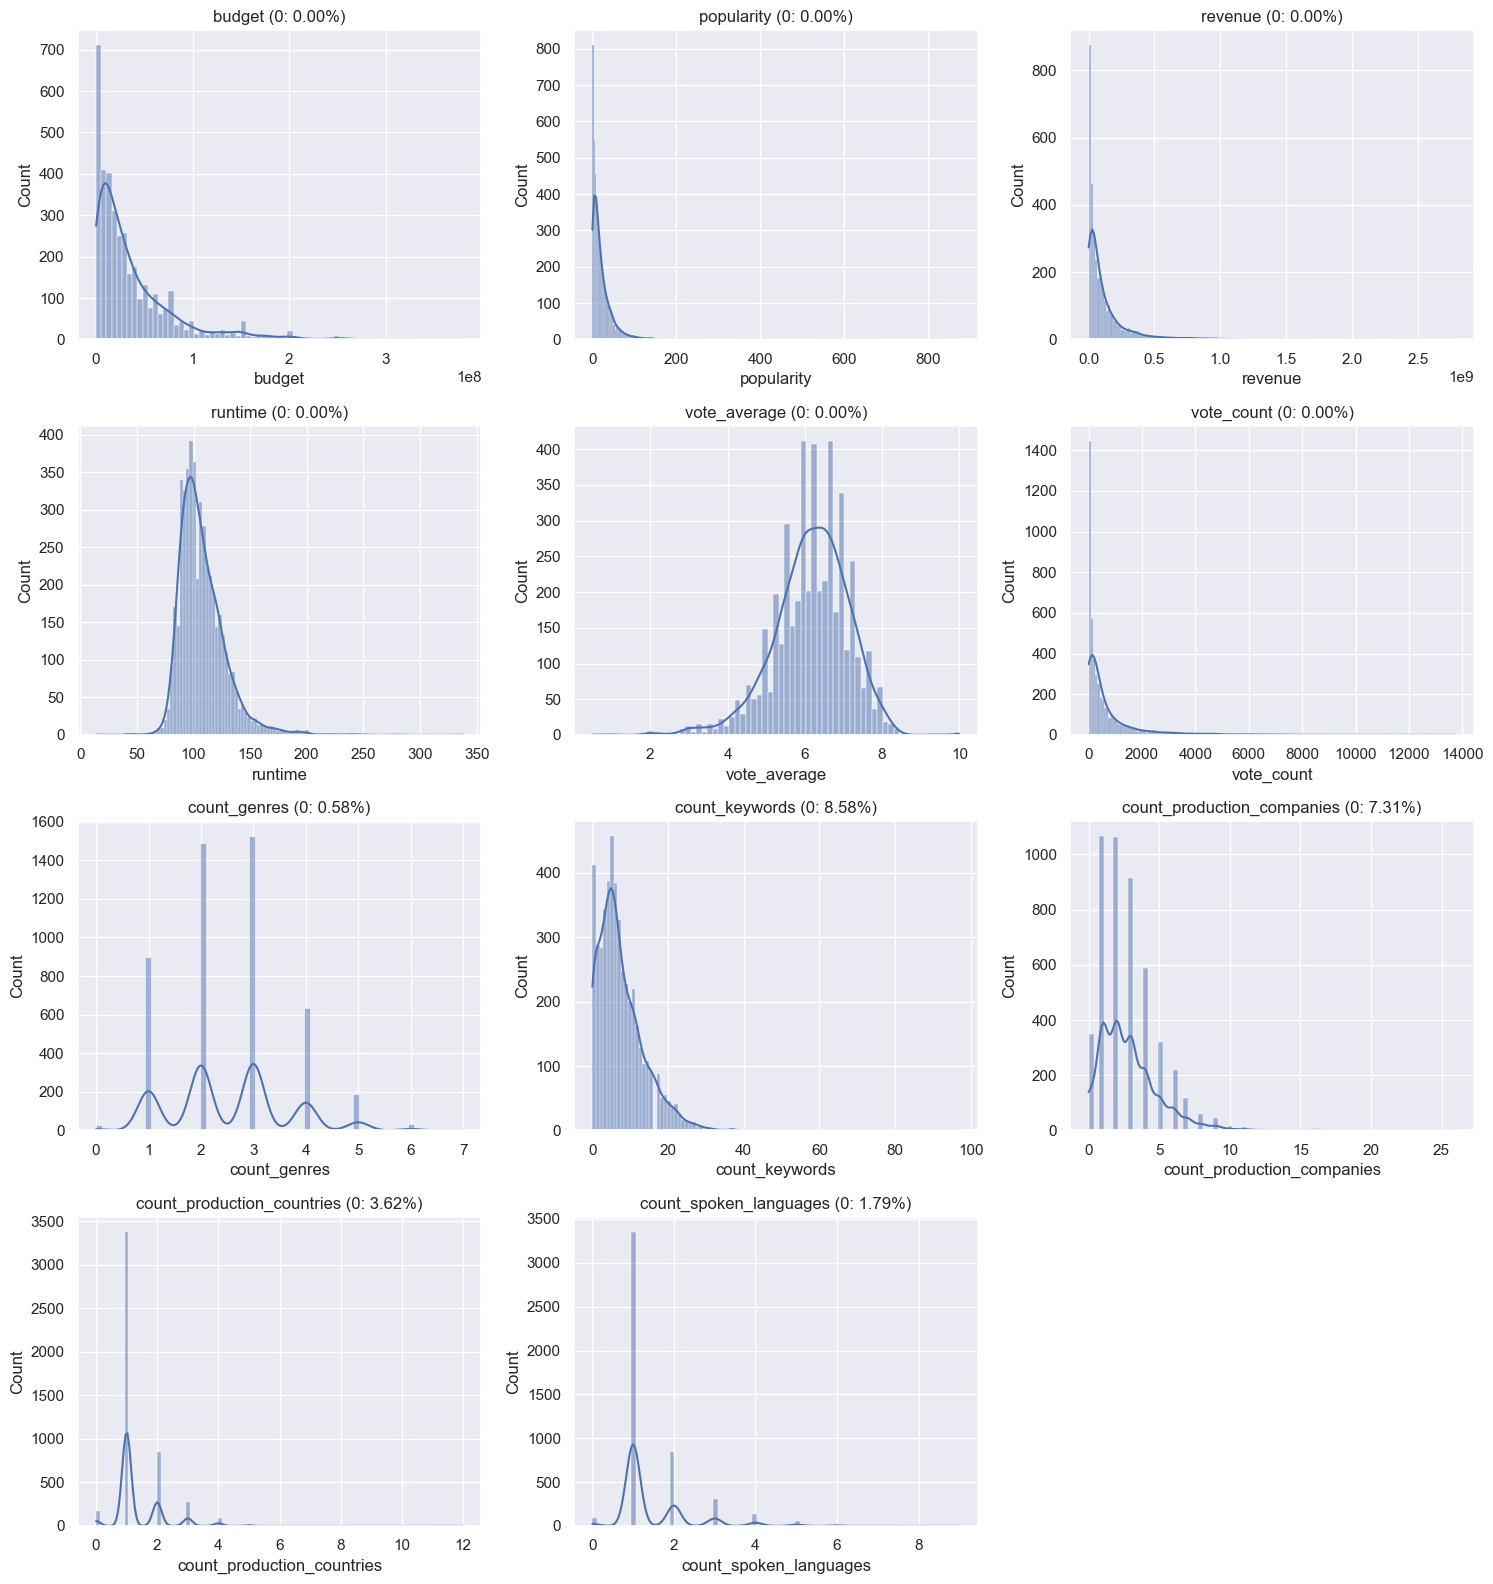

In [107]:
plot_numerical_histograms(df_cleaned, exclude_cols=['id'], n_cols=3)

### Using descriptive stats to have a deeper understanding 

### Normality Check: Skewness & Kurtosis

To assess whether the continuous variables follow a normal distribution, we evaluated both **skewness** and **excess kurtosis**.

A variable is considered approximately normally distributed if:
- **Skewness** is between -1 and 1
- **Excess kurtosis** is between -1 and 1

**Findings:**
None of the six continuous variables (`budget`, `revenue`, `popularity`, `runtime`, `vote_average`, `vote_count`) satisfied **both conditions**. This indicates that **none of them are approximately normally distributed**.

This non-normality should be considered when selecting statistical models and tests.


In [115]:
# Descriptive stats
# Define continuous columns
continuous_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']

for col in continuous_cols:
    desc = df_cleaned[col].describe()
    skewness = df_cleaned[col].skew()
    kurtosis = df_cleaned[col].kurtosis()
    print(f"Summary of {col}:\n{desc}")
    print(f"Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}\n{'-'*50}\n")

Summary of budget:
count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64
Skewness: 2.22, Kurtosis: 6.36
--------------------------------------------------

Summary of revenue:
count    3.376000e+03
mean     1.170314e+08
std      1.834831e+08
min      5.000000e+00
25%      1.535290e+07
50%      5.175184e+07
75%      1.401651e+08
max      2.787965e+09
Name: revenue, dtype: float64
Skewness: 3.89, Kurtosis: 25.73
--------------------------------------------------

Summary of popularity:
count    4802.000000
mean       21.496776
std        31.818451
min         0.000372
25%         4.671734
50%        12.924931
75%        28.332017
max       875.581305
Name: popularity, dtype: float64
Skewness: 9.72, Kurtosis: 191.99
--------------------------------------------------

Summary of runtime:
count    4766.000000
mean      107.660722
std        2

### Define a method to display the frequency of categorical variables

In [118]:


def show_category_distributions(df, top_n=10, show_plot=False):
    """
    Display frequency distributions of all category-type columns in the DataFrame.

    Parameters:
    - df: pd.DataFrame
    - top_n: int, number of top categories to show per column
    - show_plot: bool, whether to show bar plots

    Returns:
    - None (prints tables and optionally shows plots)
    """
    cat_cols = df.select_dtypes(include='category').columns
    if len(cat_cols) == 0:
        print("No category columns found.")
        return

    for col in cat_cols:
        print(f"\nColumn: {col}")
        freq = df[col].value_counts(dropna=False).head(top_n)
        print(freq)

        if show_plot:
            freq.plot(kind='bar', title=f'Top {top_n} categories in {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


#### 1.2 Categorical Variables

We use **bar plots** and **frequency tables** to show the distribution of categories in:

- `original_language`
- `status`
- `main_genres`
- `main_keywords`
- `main_production_companies`
- `main_production_countries`
- `main_spoken_languages`

To avoid sparsity, rare categories are grouped as `"Other"`.


### A quick look at the distribution of categorical data

In [122]:
cat_cols = df_cleaned.select_dtypes(include='category').columns
for col in cat_cols:
        print(f"\nColumn: {col}")
        freq = df_cleaned[col].value_counts(dropna=False).head(15)
        print(freq)


Column: original_language
original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
Name: count, dtype: int64

Column: status
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

Column: main_genres
main_genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Name: count, dtype: int64

Column: main_keywords
main_keywords
Other                           2970
Unknown                          412
based on novel                    94
independent film                  87
new york                          73
lo

 **Columns Removed Due to Irrelevance for Non-NLP Analysis**

The following categorical columns were removed because they primarily contain textual or high-cardinality data that is not suitable for analysis without natural language processing (NLP):

- **`main_keywords`**:  
  This column consists of textual keywords describing movie themes or topics. Since NLP techniques are not applied in this analysis, the large variety and sparsity of keywords—combined with a dominant `"Other"` category—makes this feature unreliable and uninformative for modeling.

- **`main_spoken_languages`**:  
  While spoken languages reflect cultural diversity, the large number of unique categories, including many `"Unknown"` values, reduces its utility in this context. Without a specific linguistic or regional focus, this variable introduces noise rather than insight.

- **`main_production_companies`**:  
  Production companies are highly diverse, and most fall under the `"Other"` category after frequency-based grouping. Unless analyzing production company effects specifically, this feature adds complexity without clear benefit to the current analysis.

---

  **Columns Retained for Their Analytical Value**

The following categorical features were retained due to their meaningful contribution to the analysis:

- **`original_language`**: Represents the primary language of the movie, strongly associated with market and cultural aspects.

- **`status`**: Contains a small set of categories reflecting the movie's production or release stage, important for filtering or segmentation.

- **`main_genres`**: Captures the primary genre, which is a key descriptive attribute in movie data analysis.

- **`main_production_countries`**: Indicates the country of production, useful for regional market insights.

---

By removing high-cardinality and text-heavy columns without NLP support, the dataset becomes more manageable and better suited for traditional statistical and machine learning methods.



Column: original_language
original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
Name: count, dtype: int64


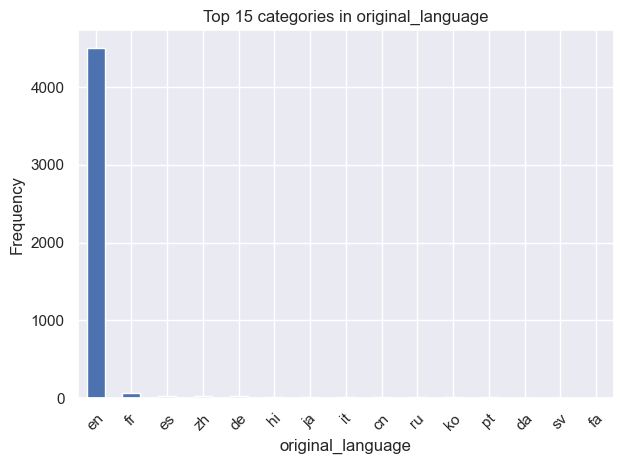


Column: status
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64


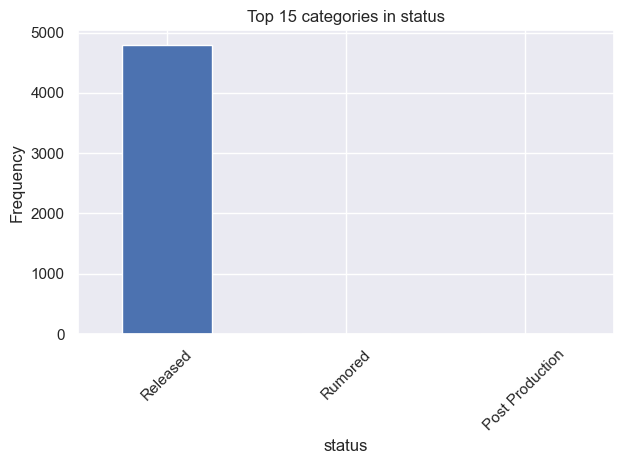


Column: main_genres
main_genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Name: count, dtype: int64


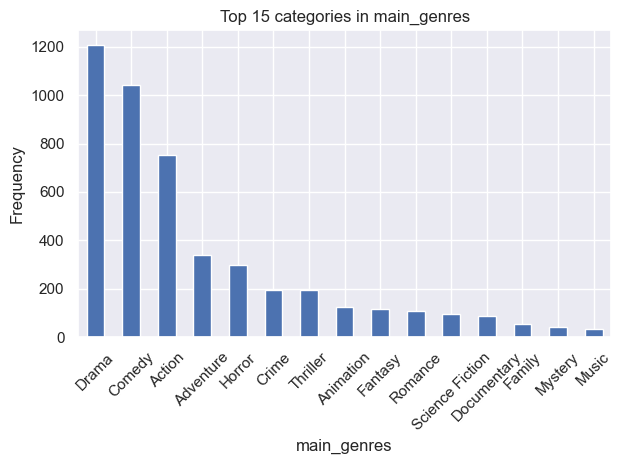


Column: main_keywords
main_keywords
Other                           2970
Unknown                          412
based on novel                    94
independent film                  87
new york                          73
london england                    61
prison                            60
suicide                           48
paris                             44
woman director                    43
sex                               42
father son relationship           39
brother brother relationship      36
holiday                           35
saving the world                  34
Name: count, dtype: int64


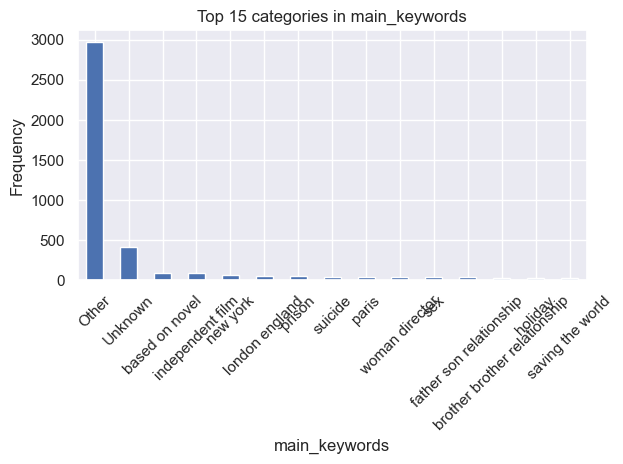


Column: main_production_companies
main_production_companies
Other                                     2025
Unknown                                    351
Paramount Pictures                         281
Universal Pictures                         260
Columbia Pictures                          200
Twentieth Century Fox Film Corporation     177
New Line Cinema                            157
Walt Disney Pictures                       114
Miramax Films                               87
United Artists                              72
Village Roadshow Pictures                   71
Warner Bros.                                65
Columbia Pictures Corporation               65
DreamWorks SKG                              64
Fox Searchlight Pictures                    63
Name: count, dtype: int64


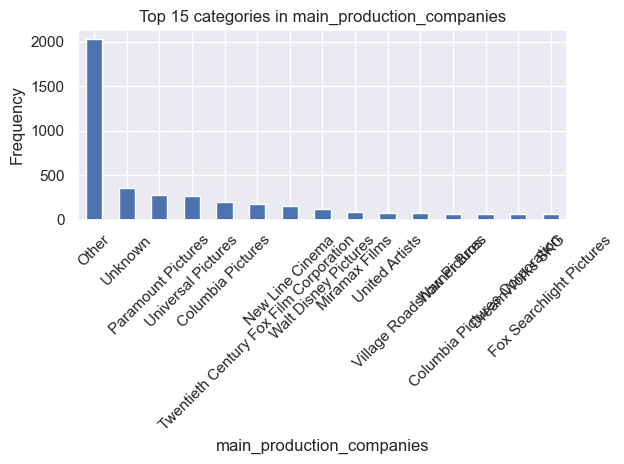


Column: main_production_countries
main_production_countries
United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
Unknown                      174
France                       174
Australia                     87
India                         42
China                         40
Spain                         34
Japan                         34
Italy                         26
Ireland                       22
Hong Kong                     22
Mexico                        22
Name: count, dtype: int64


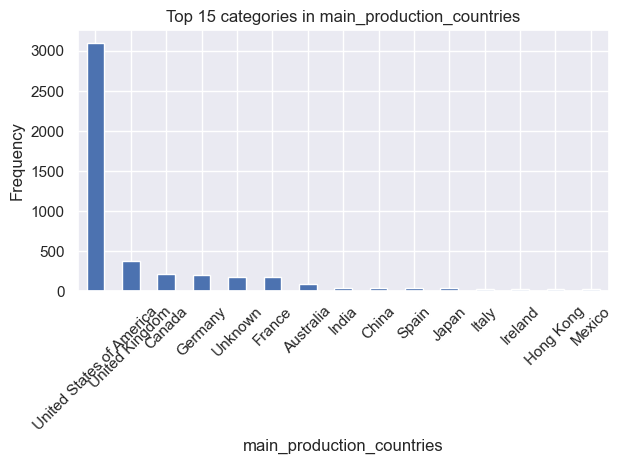


Column: main_spoken_languages
main_spoken_languages
English      4102
Français      108
Unknown        86
Español        84
Deutsch        61
العربية        33
Italiano       32
普通话            32
Pусский        31
Český          30
广州话 / 廣州話      28
日本語            23
हिन्दी         22
Português      17
               12
Name: count, dtype: int64


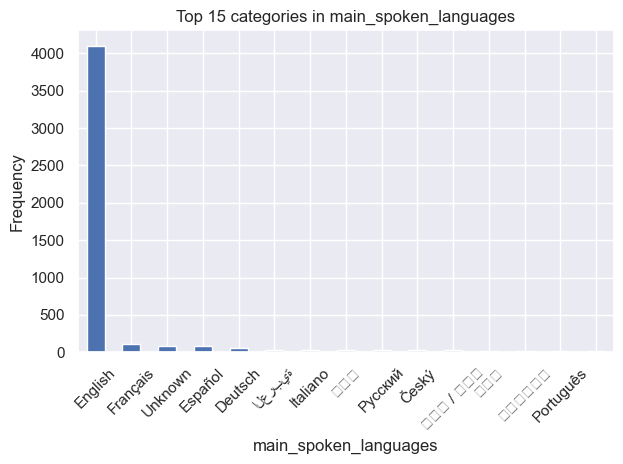

In [125]:
import warnings
#Since the 'spoken language' column will be deleted, I ignore the warning about text display error in this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    #show the distribution of categorical variables
    show_category_distributions(df_copy1, top_n=15, show_plot=True)


### Remove useless columns in category type
* I named the new dataframe -- df_cleaned1

In [128]:
df_cleaned1 = df_cleaned.copy()  # copy a new df
cols_to_drop = ['main_keywords', 'main_spoken_languages', 'main_production_companies'] #select the columns to drop
df_cleaned1.drop(cols_to_drop, axis=1, inplace=True)  

show_category_distributions(df_cleaned1, top_n=15, show_plot=False)


Column: original_language
original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
Name: count, dtype: int64

Column: status
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

Column: main_genres
main_genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Name: count, dtype: int64

Column: main_production_countries
main_production_countries
United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
Unknown                      17

### 2. Relationships Between Variables

#### 2.1 Continuous vs Continuous
**Choice of Correlation Method**

Since all numeric variables show significant deviations from normality (skewness and kurtosis > ±1), we avoid using Pearson correlation, which assumes linear and normally distributed data.

Instead, we use **Spearman's rank correlation**, a non-parametric method that measures monotonic relationships and is robust to skewness and outliers. This provides a more reliable assessment of the relationships between variables such as `budget`, `revenue`, `popularity`, and others.


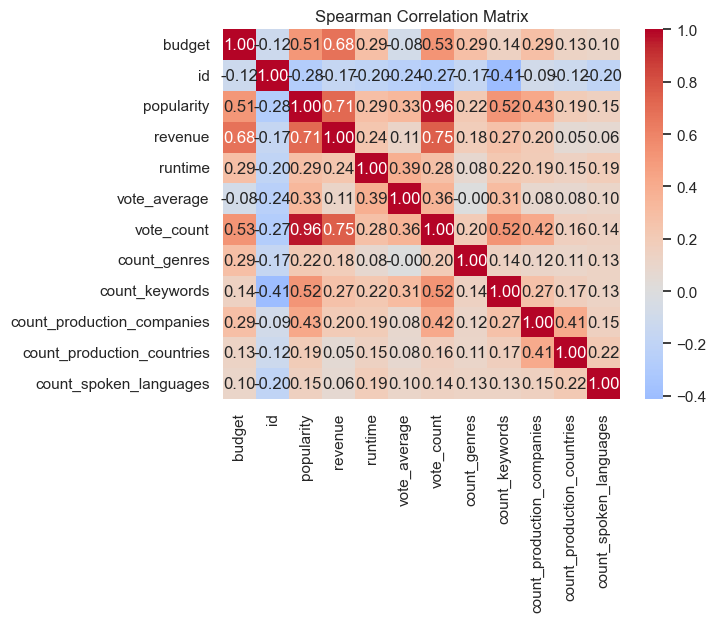

In [131]:
numeric_df = df_cleaned1.select_dtypes(include=['number'])  # select numerical columns

spearman_corr = numeric_df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

**Exploring Selected Relationships with Scatter Plots**
Based on the Spearman correlation heatmap, we selected three variable pairs that show strong or interesting relationships. To visualize their patterns and potential associations, we use scatter plots.
In order to demonstrate the impact of multiple variables on a single variable in the data mining section, I have selected three sets of data that are positively correlated with revenue. they are: 
- **`budget vs revenue`**

- **`vote_count vs revenue`**:  

- **`popularity vs revenue`**:  


Scatter plots help us identify the shape, direction, and strength of relationships, and assess whether any transformations or modeling are needed.



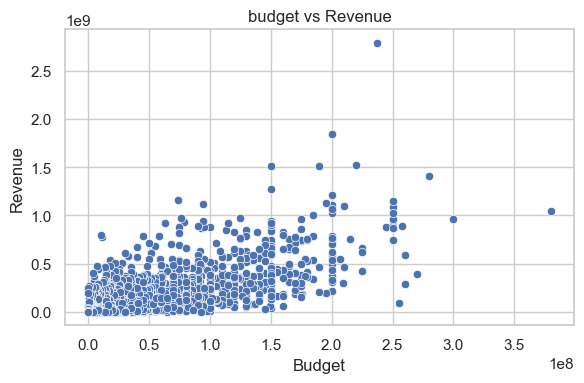

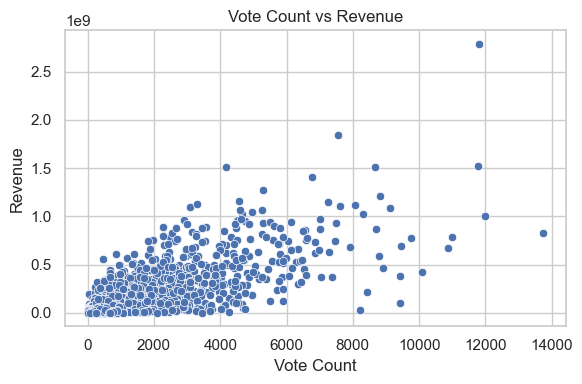

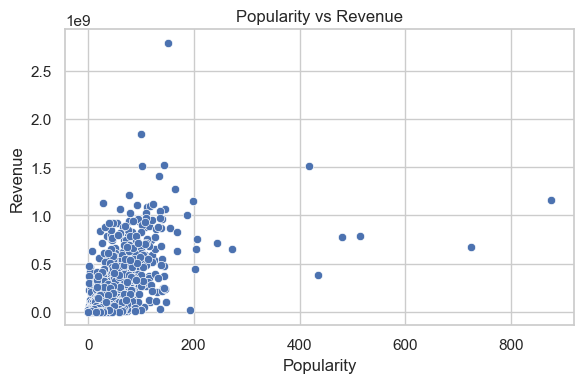

In [134]:
# Set plot style
sns.set(style="whitegrid")

# Plot 1: Vote_count vs Revenue
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned1, x='budget', y='revenue')
plt.title('budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()



# Plot 3: Vote Count vs popularity
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x='vote_count', y='revenue')
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Plot 3: Popularity vs Revenue
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cleaned, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### 2.2 Categorical vs Categorical
We explore co-occurrence patterns or relationships between categorical variables using:
- **Chi-Square Independence Test**

To examine the relationships between all pairs of categorical variables, we performed Chi-Square Tests of Independence.

- **Test**: For each variable pair, we created a contingency table and computed the chi-square statistic and p-value.
- **Threshold**: A p-value < 0.05 suggests a statistically significant association.

This analysis helps identify potentially dependent categorical features, guiding further modeling or feature engineering.

However, by using **Stacked bar charts** to show the distribution relationship and differences between categories, I found that **in the categories of origin_language and status, the main categories account for more than 90%**. This leads to even a very small deviation, a very high Chi-square statistic and a very small p-value, making the data appear **"significantly correlated"**.

Therefore, I **do not think** that the strong correlations that involve **`origin_language`** or **`status`**   have sufficient research value and modeling conditions.

As a result, I choose to explore the relationship between **`main_genres`** and  **`main_production_countries`** in the following session.

In [137]:
# select all four categorical data
cat_cols = df_cleaned1.select_dtypes(include='category').columns
# Initialize a list to store chi-squared test results
results = []

for col1, col2 in combinations(cat_cols, 2):
     # Create a contingency table (cross-tabulation) for the two variables
    contingency = pd.crosstab(df_cleaned1[col1], df_cleaned1[col2])
    
# Perform the Chi-squared test of independence
    chi2, p, dof, expected = chi2_contingency(contingency)
    # Store the result and append to results list
    results.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Chi2': chi2,
        'p-value': p,
        'Significant': p < 0.05
    })
# Convert the results into a DataFrame for easier viewing
chi2_results = pd.DataFrame(results)
print(chi2_results.sort_values('p-value'))

          Variable 1                 Variable 2          Chi2        p-value  \
2  original_language  main_production_countries  56237.505736   0.000000e+00   
0  original_language                     status    799.750657  2.686252e-123   
5        main_genres  main_production_countries   1913.969369   8.189084e-63   
1  original_language                main_genres    864.406816   1.625120e-04   
3             status                main_genres     20.504867   9.954902e-01   
4             status  main_production_countries     29.201825   1.000000e+00   

   Significant  
2         True  
0         True  
5         True  
1         True  
3        False  
4        False  


### Stacked Bar Charts for Categorical Variable Pairs

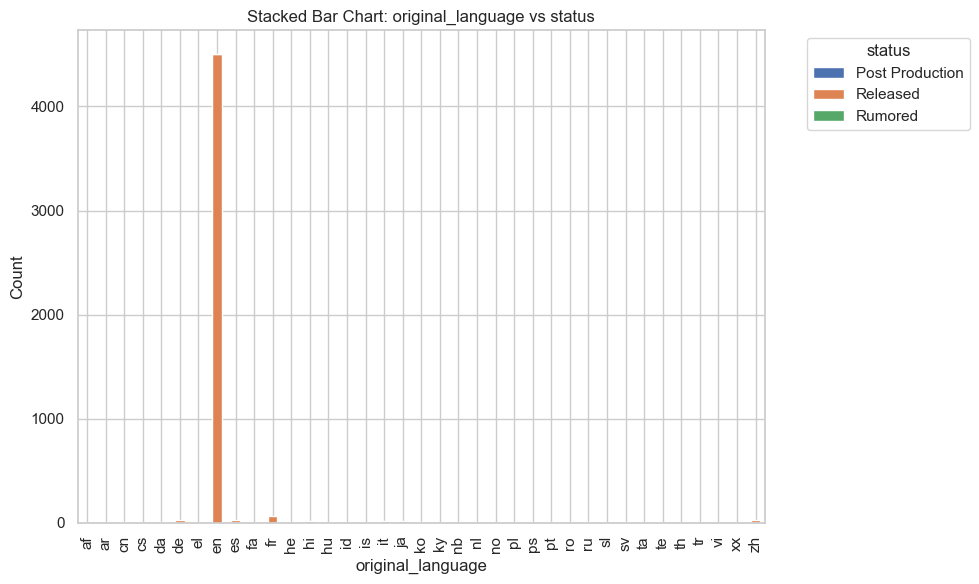

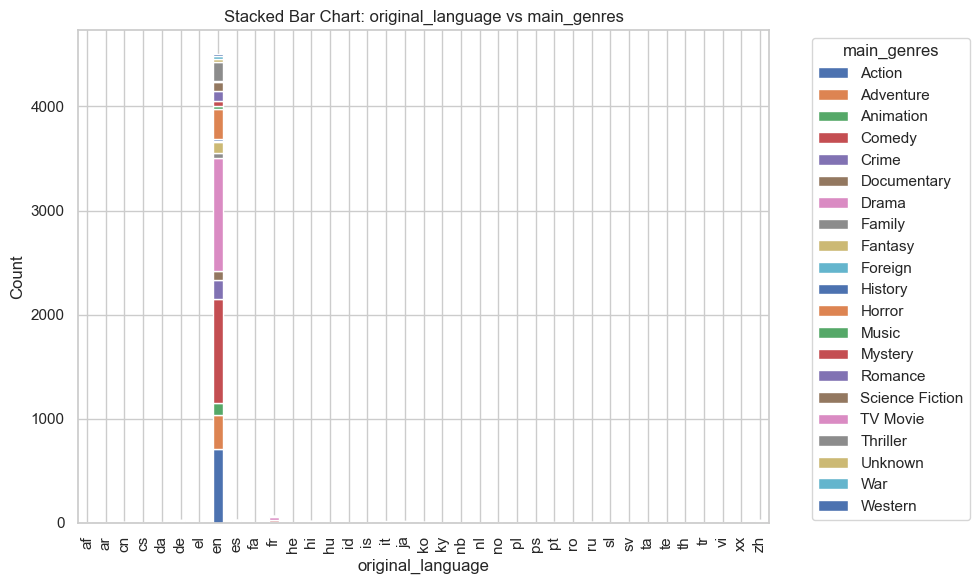

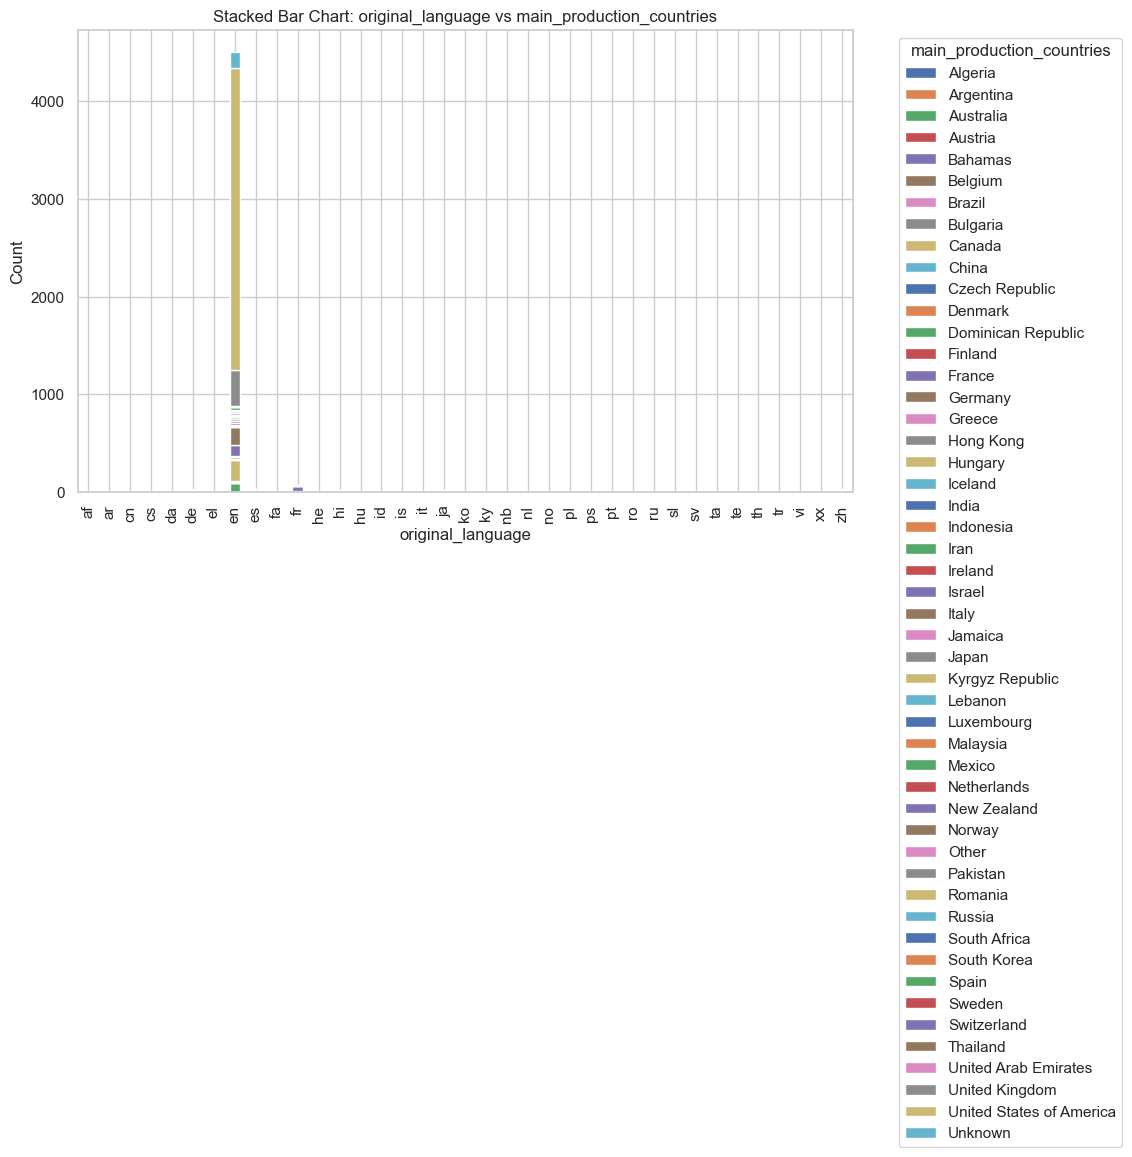

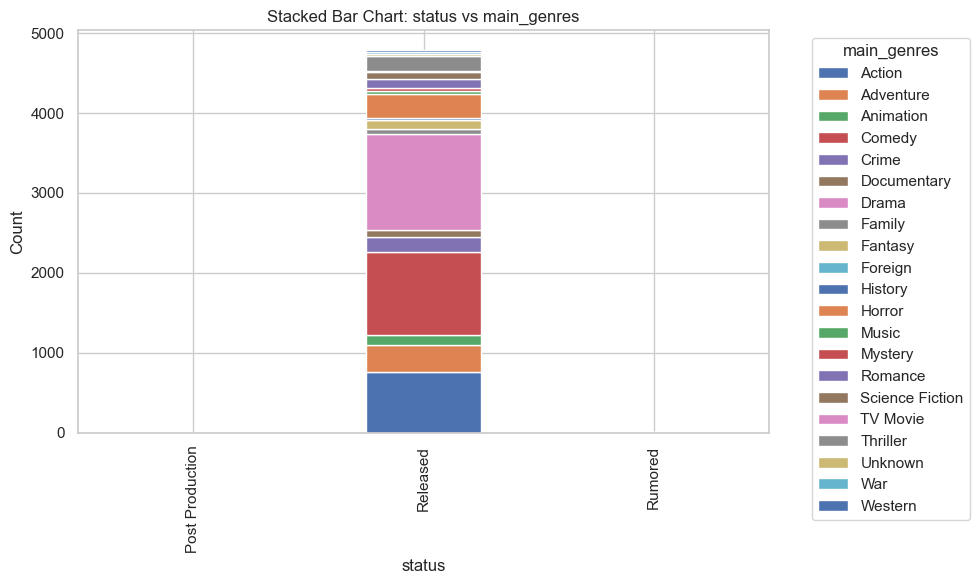

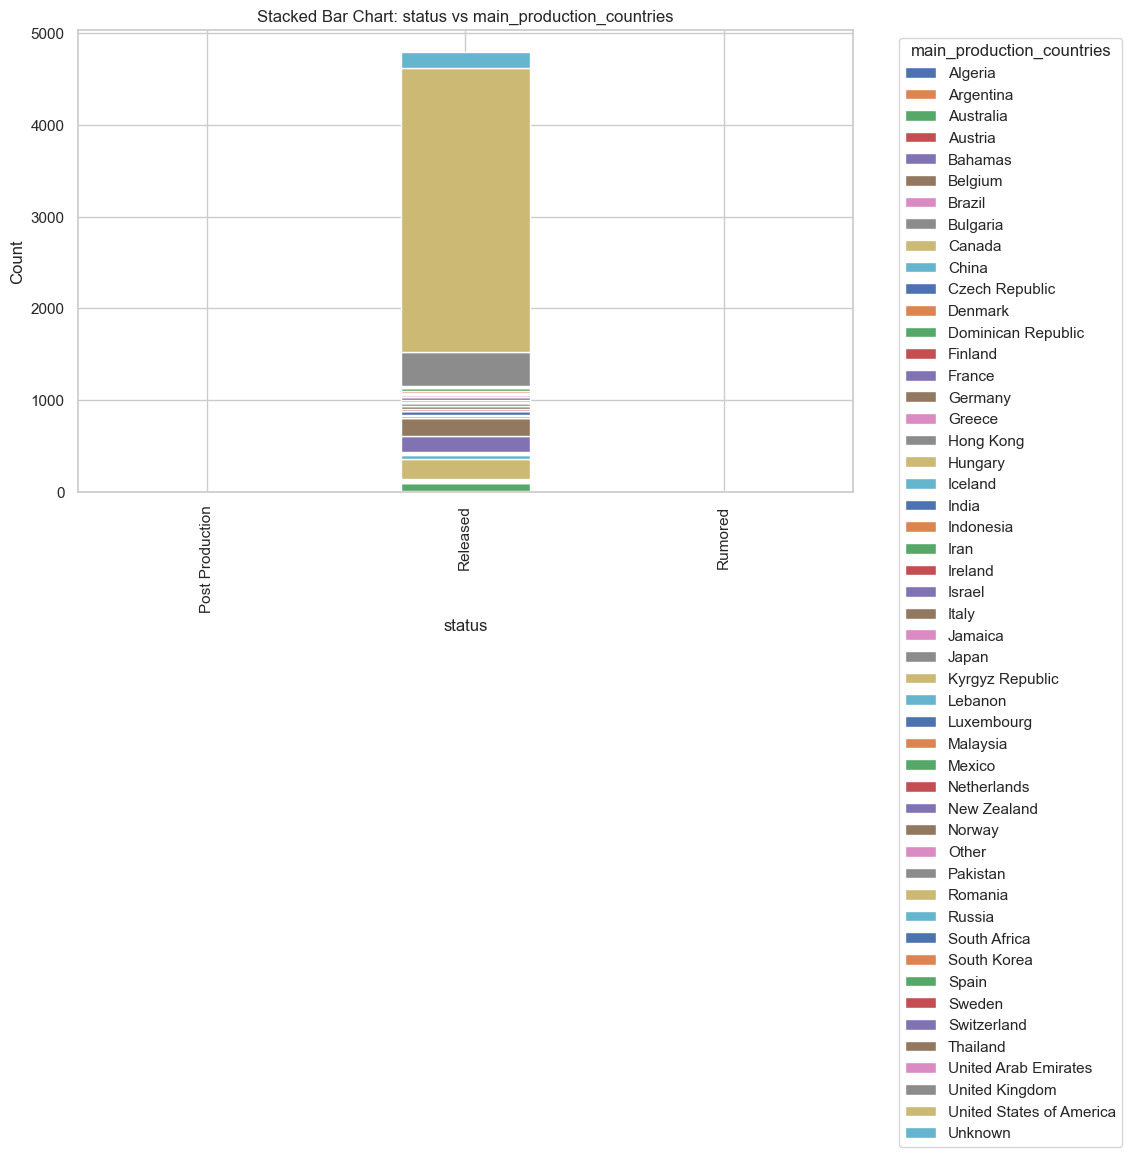

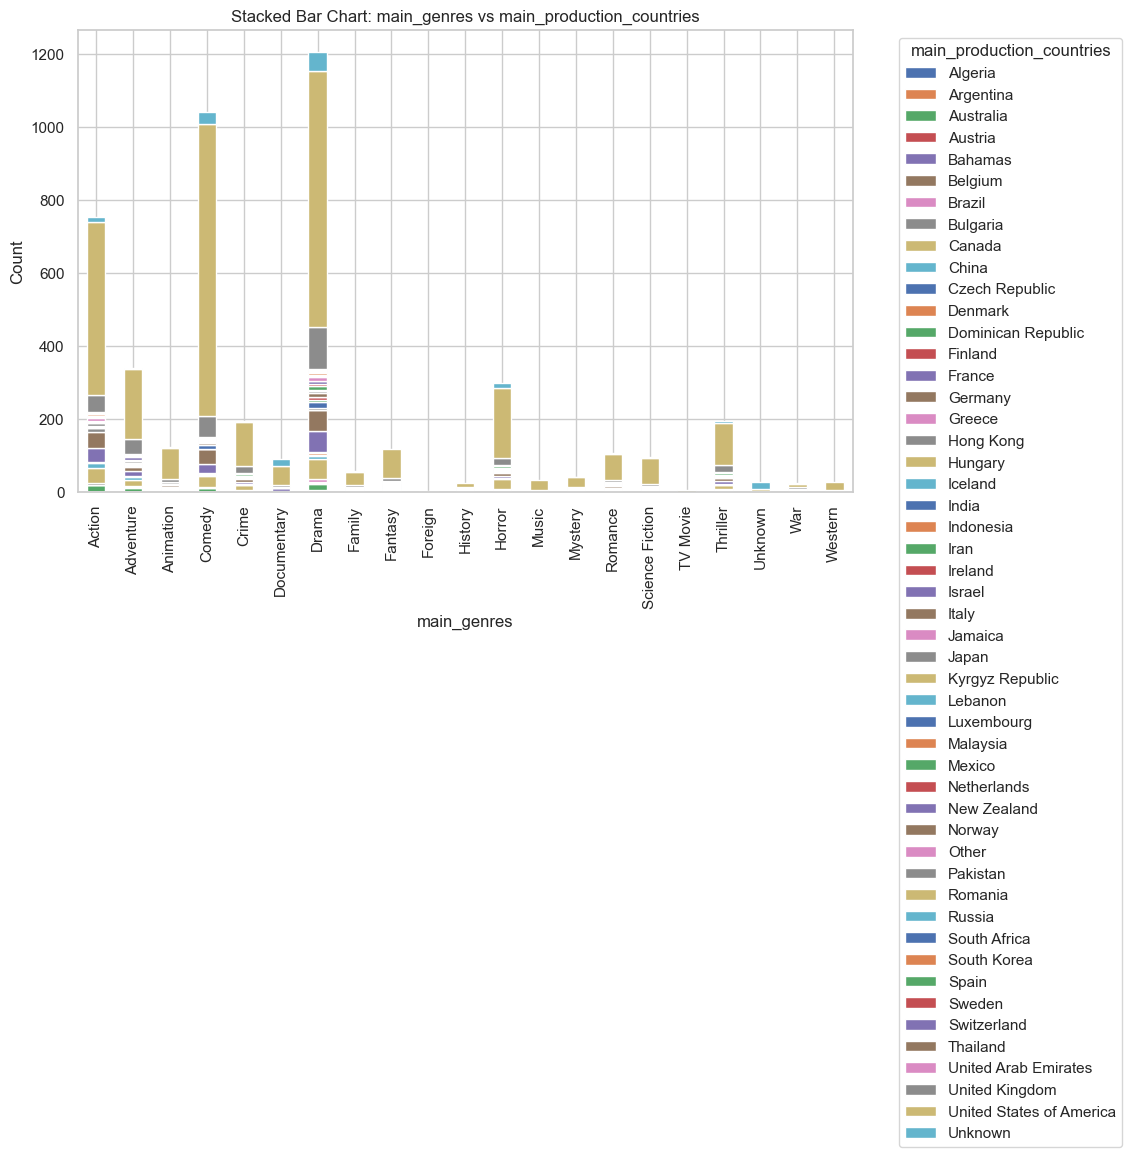

In [140]:
#see
cat_cols = df_cleaned1.select_dtypes(include='category').columns

for col1, col2 in combinations(cat_cols, 2):
    contingency = pd.crosstab(df_cleaned1[col1], df_cleaned1[col2])
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
   
        plt.figure(figsize=(10,6))
        contingency.plot(kind='bar', stacked=True, ax=plt.gca())
    
        plt.title(f'Stacked Bar Chart: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel('Count')
        plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

#### 2.3 Categorical vs Continuous
We investigate how continuous variables vary across categories using:
- **Kruskal-Wallis H Test**
- **Boxplots**
- **Violin plots**
- **Grouped bar charts**

According to the test results, I found that for all the numerical variables studied, there are significant differences in the distribution of the corresponding numerical variables between the different categories of the two categorical variables 'main_genres' and 'main_production_countires'.
However, due to the uneven distribution of categories in 'main_production_countires'(), the limited time to complete the assignment, and the fact that budget is an important indicator for analyzing the movie market, **I decided to focus on the relationship between 'main_genres' and 'budget'**

## Why Use the Kruskal-Wallis H Test?

In this exploratory data analysis, we aim to investigate whether continuous numerical variables differ significantly across groups defined by categorical variables. Given the characteristics of our data, the Kruskal-Wallis H test is an appropriate choice for the following reasons:

1. **Non-Normal Distribution of Numerical Variables**  
   All the continuous variables in our dataset have been tested and found to significantly deviate from a normal distribution. Traditional parametric tests such as ANOVA require normality assumptions, which are violated here. The Kruskal-Wallis H test, a non-parametric alternative, does not assume normality and is robust to such deviations.

2. **Categorical Independent Variables with Multiple Groups**  
   The test is suitable for comparing more than two independent groups defined by categorical variables, making it ideal for variables like `main_genres` and `main_production_countries`.

3. **Independence of Observations**  
   The test assumes that the groups are independent, which is satisfied as the categorical groups in our dataset represent distinct, non-overlapping categories.

---

## Variables Unsuitable for Kruskal-Wallis Testing

While the Kruskal-Wallis test is suitable for some categorical variables, others are not appropriate due to their extreme class imbalance or insufficient sample sizes:

- **`original_language`**  
  This variable is heavily dominated by the category `'en'` (English), which accounts for over 90% of the data. The remaining categories have very few samples, making group comparisons unreliable and statistically weak.

- **`status`**  
  Nearly all observations belong to the `'Released'` category, with the other categories (`'Rumored'`, `'Post Production'`) containing very few samples. Such imbalance leads to unstable and meaningless test results.

---

## Summary

| Variable                  | Suitability for Kruskal-Wallis Test        |
|---------------------------|---------------------------------------------|
| `main_genres`             | Suitable                                   |
| `main_production_countries` | Suitable (consider filtering very rare groups) |
| `original_language`       | Not suitable due to extreme imbalance      |
| `status`                  | Not suitable due to very few samples in minor categories |

---

Given these considerations, the Kruskal-Wallis H test is the preferred method to assess differences in numerical variables across the balanced categorical groups (`main_genres` and `main_production_countries`) while avoiding misleading conclusions from heavily imbalanced categories.


In [144]:
# Show categorical variable distributions (function defined elsewhere), without plotting
show_category_distributions(df_cleaned1, top_n=15, show_plot=False)

print()
# Select numerical and categorical columns
num_cols = df_cleaned1.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_cleaned1.select_dtypes(include=['category']).columns.difference(['original_language', 'status'])
# List to store Kruskal-Wallis test results
results = []
# Loop through each combination of categorical and numerical variables
for cat_col in cat_cols:
    for num_col in num_cols:
        groups = []
        # Group numerical values by each category in the categorical variable
        for category in df_cleaned1[cat_col].cat.categories:
            group = df_cleaned1[df_cleaned1[cat_col] == category][num_col].dropna()
            # Only consider groups with more than 5 observations to avoid unreliable statistics
            if len(group) > 5:
                groups.append(group)
        
        # Skip comparison if fewer than 2 valid groups
        if len(groups) < 2:
            continue
        
        # Perform Kruskal-Wallis H-test (non-parametric test for independent samples)
        stat, p = kruskal(*groups)
        
        results.append({
            'Categorical Variable': cat_col,
            'Numerical Variable': num_col,
            'Statistic': stat,
            'p-value': p,
            'Significant': p < 0.05
        })

# Convert results to DataFrame
kruskal_results = pd.DataFrame(results)
# Filter and sort significant results by p-value
significant_results = kruskal_results[kruskal_results['Significant']].sort_values('p-value')

print(significant_results)


Column: original_language
original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
Name: count, dtype: int64

Column: status
status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

Column: main_genres
main_genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Name: count, dtype: int64

Column: main_production_countries
main_production_countries
United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
Unknown                      17

### Data visualizaion of relationship between 'main_genres' and 'budget'

### 1. Significant Differences in Budget Distribution Across Genres  
#### High-Budget Genres  
- ​**Action**​  
  - ​**Boxplot**: Median budget far exceeds most genres, with outliers (circles) indicating extreme high budgets (e.g., >$300M).  
  - ​**Violin Plot**: Wide distribution with a long upper tail, reflecting high variability and frequent large-scale investments.  
  - ​**Bar Chart**: Highest average budget (~$80M), driven by blockbuster films.  

- ​**Science Fiction & Fantasy**​  
  - ​**Boxplot/Violin Plot**: High median budgets and dense distributions, suggesting consistent investment in特效-driven projects.  

#### Low-Budget Genres  
- ​**Documentary & Thriller**​  
  - ​**Boxplot**: Median clustered near the lower end ($50M–$100M), with narrow violins indicating concentrated, resource-constrained budgets.  
  - ​**Bar Chart**: Average budgets among the lowest (~$50M for Documentary).  

- ​**Family & Music**​  
  - Similar patterns: Tight distributions and low averages (~$30M–$40M), likely due to limited audience appeal or funding.  

---

### 2. Distribution Shape Variations  
#### Right-Skewed Distributions (High-Budget Genres)  
- ​**Action/Sci-Fi**​  
  - Boxplots show right-skewed distributions (long upper tails) with frequent outliers (e.g., Action’s boxplot has clustered circles above $200M).  
  - Violin plots highlight asymmetry, with most data clustered at lower budgets but a long tail for high outliers.  

#### Symmetric/Centralized Distributions (Low-Budget Genres)  
- ​**Documentary**​  
  - Boxplot and violin plot are symmetric and narrow, indicating minimal variability and budgets concentrated around the median (~$60M).  
  - Likely constrained by indie production budgets or niche funding sources.  

---

### 3. Discrepancy Between Mean and Distribution Shape  
- ​**Animation**​  
  - ​**Bar Chart**: Highest average budget (~$75M), but ​**boxplot**​ reveals a lower median than Action.  
  - ​**Explanation**: Left-skewed distribution—most Animation films have moderate budgets, but a few low-budget outliers reduce the median.  

- ​**Action**​  
  - Boxplot median aligns with its high average (~$80M), indicating most films cluster in the upper budget range.  

---

### 4. Extreme Budget Disparities  
- ​**Magnitude Gap**​  
  - Highest-budget genres (Action/Sci-Fi: ~$200M–$350M) vs. lowest (Documentary: ~$50M)—a ​**7x–70x difference**.  
  - Reflects market prioritization: High-stakes blockbusters vs. low-cost documentaries.  

---

### 5. Data Quality Considerations  
- ​**Inconsistent Genre Labels**​  
  - Typos like "Thrimler" (Thriller) and "Hrorr" (Horror) require cleaning for reliability.  
- ​**Sample Imbalance**​  
  - Rare genres (War, TV Movie) have sparse samples, potentially skewing averages.  

---

### Summary Insights  
- ​**Commercial Strategy**: High-budget genres (Action/Sci-Fi) rely on blockbuster models, while low-budget genres (Documentary) prioritize niche storytelling.  
- ​**Risk Management**: Extreme outliers in Action/Sci-Fi suggest volatile ROI; diversification is critical.  
- ​**Data Optimization**: Consolidate rare genres and correct labeling errors to improve analysis validity.  


* Unfortunately, due to time constraints and lack of valid data on the impact of other variables on budget, I have no way to further explore their impact on budget. This is where I can stop in this part of the experiment.

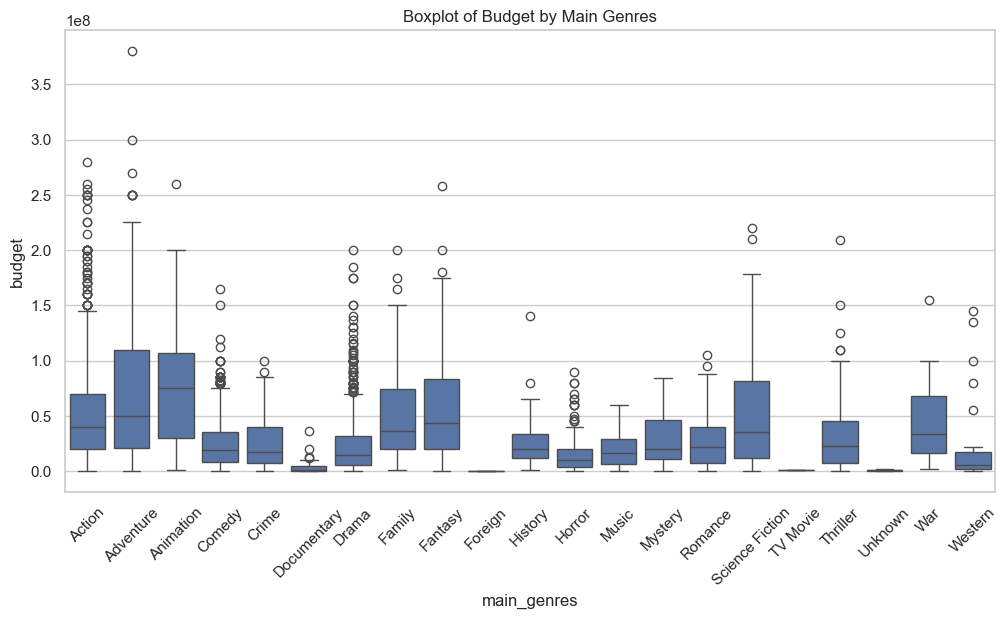

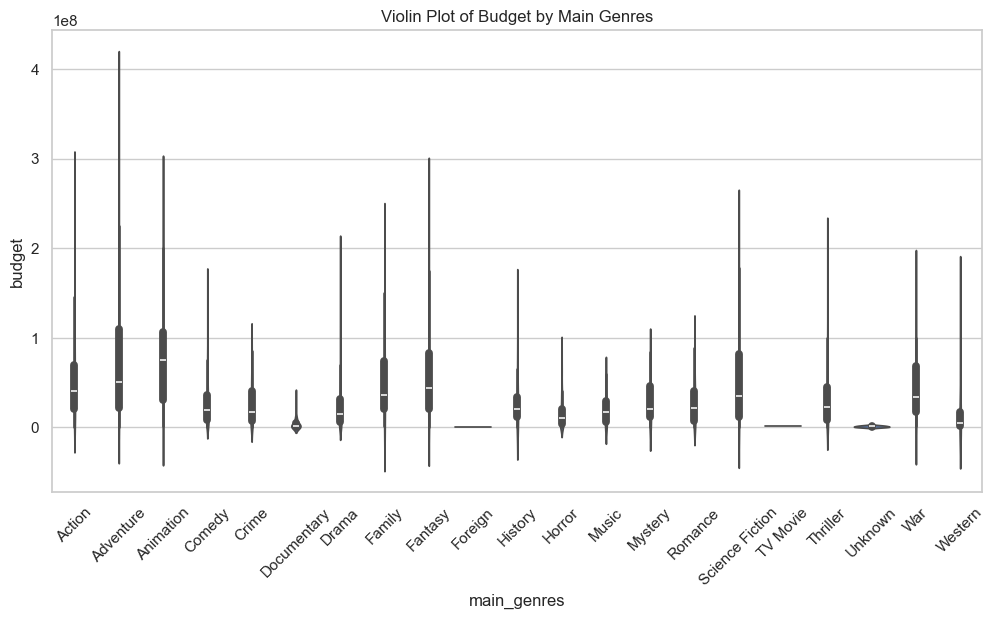

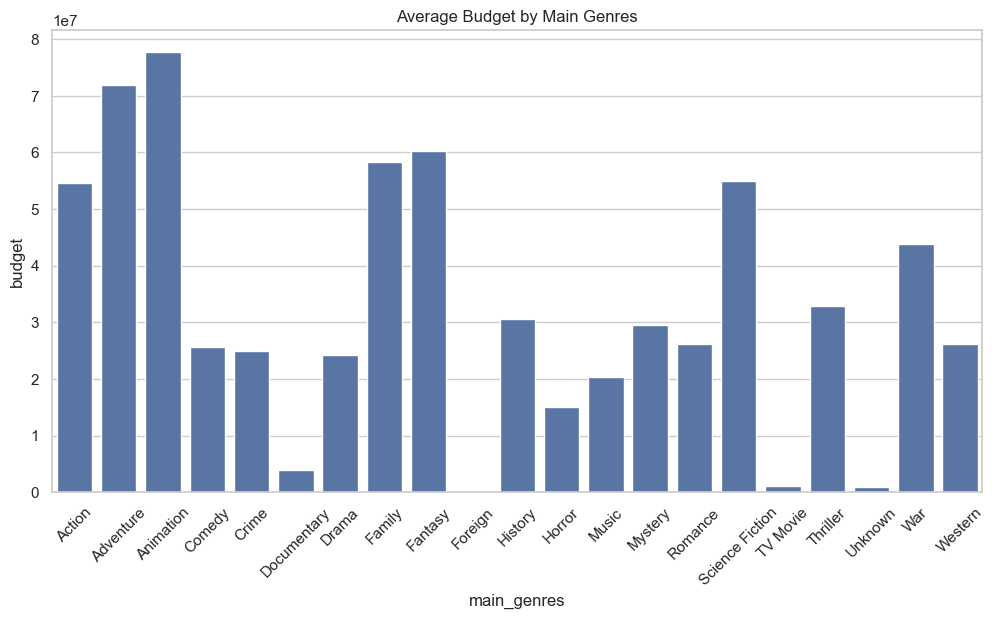

In [147]:
# Boxplot of Budget by Main Genres
plt.figure(figsize=(12,6))
sns.boxplot(x='main_genres', y='budget', data=df_cleaned1)
plt.xticks(rotation=45)
plt.title('Boxplot of Budget by Main Genres')
plt.show()
#Violin Plot of Budget by Main Genres
plt.figure(figsize=(12,6))
sns.violinplot(x='main_genres', y='budget', data=df_cleaned1)
plt.xticks(rotation=45)
plt.title('Violin Plot of Budget by Main Genres')
plt.show()

#Average Budget by Main Genres
mean_budget = df_cleaned1.groupby('main_genres', observed=True)['budget'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='main_genres', y='budget', data=mean_budget)
plt.xticks(rotation=45)
plt.title('Average Budget by Main Genres')
plt.show()

### 3 Time-Based Analysis
We analyze how key variables vary over time using release_date.

Among all numerical features, revenue is of particular interest as it directly reflects the commercial success of a movie. Exploring its trend over time may reveal industry shifts, market growth, or the impact of global events on box office performance. 

Therefore, I chose to focus on the time series analysis of revenue to gain insights into how movie profitability has evolved over the years.

In [150]:
numeric_cols = df_cleaned1.select_dtypes(include='int'and 'float').columns
nc=df.select_dtypes(include='int'and 'float').columns
print(numeric_cols)
print(nc)

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')


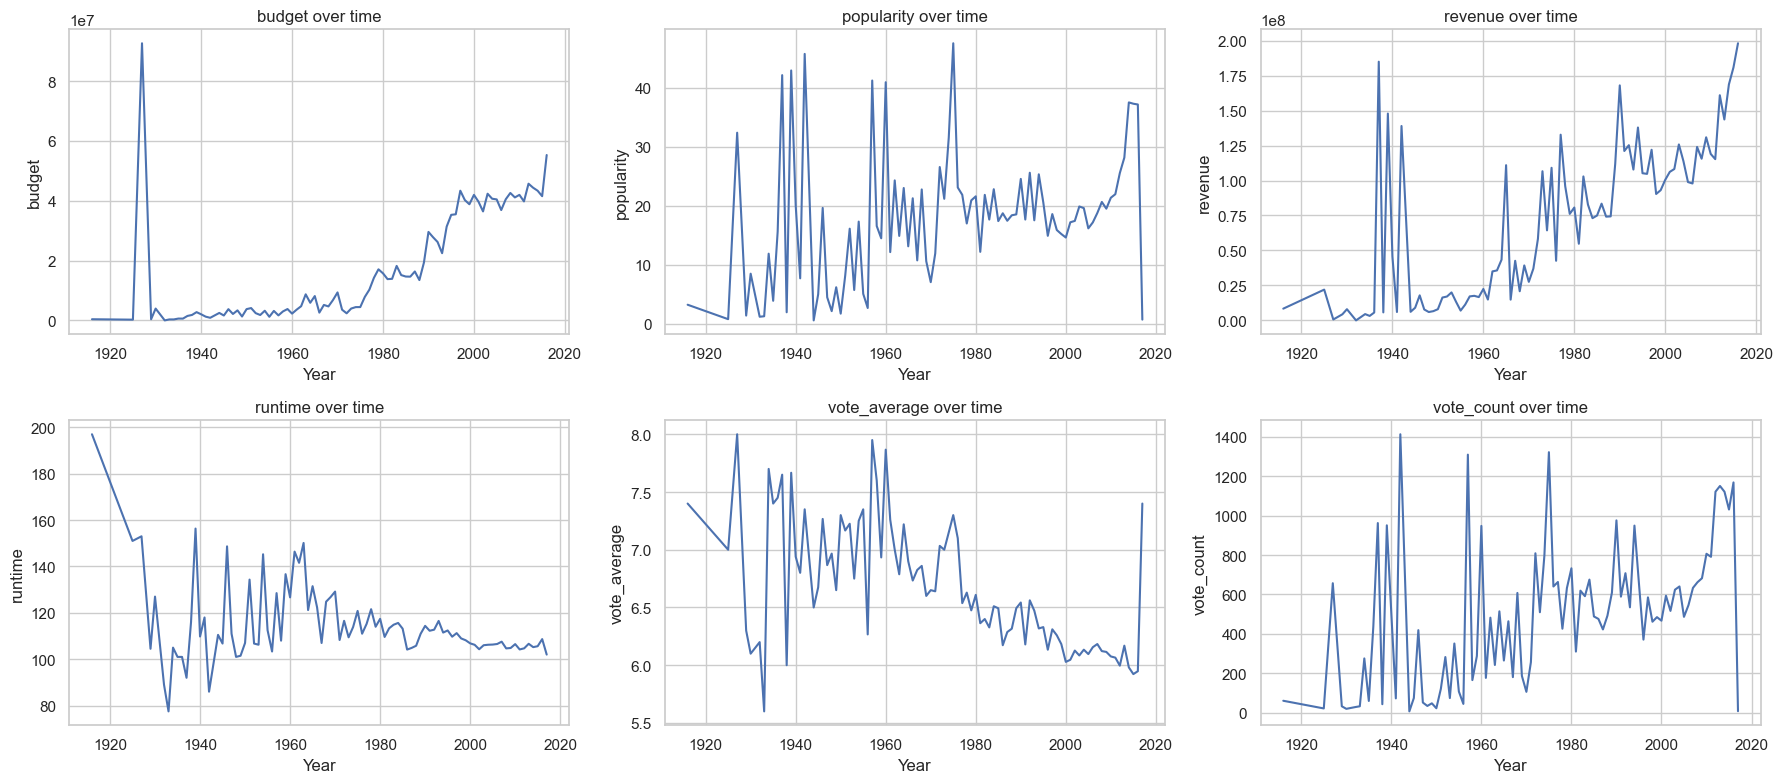

In [154]:
df_cleaned1['year'] = df_cleaned1['release_date'].dt.year
# Extract the year from the 'release_date' column and create a new 'year' column
# Select numeric columns (integers and floats), excluding irrelevant ones like 'id' and 'year'
numeric_cols = df_cleaned1.select_dtypes(include='int'and 'float').columns
numeric_cols = [col for col in numeric_cols if col not in ['id','year']]

# Calculate number of subplots needed and layout dimensions
n_cols = 3
n_vars = len(numeric_cols)
n_rows = int(np.ceil(n_vars / n_cols))

# Set the overall figure size based on layout
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop through each numeric variable and plot its yearly trend
for i, col in enumerate(numeric_cols, 1):
    yearly_trend = df_cleaned1.groupby('year')[col].mean()  # Uing mean() here

    plt.subplot(n_rows, n_cols, i)
    sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
    plt.title(f"{col} over time")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

### 4. Interesting relationships

In the previous EDA, I selected some interesting relationships according to the situation for further analysis in the subsequent data mining session. These relationsips includes:

**Continuous vs Continuous**
* vote_count vs revenue
* budget vs revenue
* popularity vs revenue

**Categorical vs Categorical**
* main_genres vs main_production_countriesn

**Categorical vs Continuous**
* main_genres and budget

*The exploration of **`main_genres`** and **`budget`** relationship has been completed and will not be continued in the data mining phase.

**Time series analysis**
* year vs revenue

These relationships can be tested or validated using modeling techniques in subsequent session.

# DATA PREPROCESSING AND DATA MINING TECHNIQUES (interpretable model)

### Interpreting Multi-Variable Impacts on Movie Revenue Using Random Forest and SHAP

### Analysis Overview
This implementation demonstrates how Random Forest regression combined with SHAP (SHapley Additive exPlanations) values can quantify and visualize the individual impacts of three key movie features - ​**budget**, ​**popularity**, and ​**vote_count**​ - on ​**revenue**​ prediction##
## Key Findings

​**Feature Impact Ranking**​  
`vote_count` > `budget` ≫ `popularity`  

​**SHAP Value Distribution**​  
| Feature      | SHAP Range      | Impact Pattern            | Value Correlation |
|--------------|-----------------|---------------------------|-------------------|
| vote_count   | 0.4 - 1.0 (1e9) | Wide positive distribution| Higher = Strong ↑|
| budget       | 0.2 - 0.8 (1e9) | Moderate positive spread  | Linear increase   |
| popularity   | -0.2 - 0.2 (1e9)| Tight cluster near zero   | Minimal imp### Interpretation Insights

1. **Dominant Predictive Signals**  
   - Vote counts account for ~60% of model's predictive power (per spread width)
   - High vote_count (>Q3) triggers disproportionate revenue gains (right-tailed distribution)

2. **Budget-Revenue Relationship**  
   - Visible dose-response pattern:  
     ```math
     Δbudget $1M → ≈$0.5M SHAP value increase (estimated from 0.2-0.8 range)
     ```
   - No observable diminishing returns in current value rangeact    |s.




start to train model
model training completed
start to compute SHAP value


100%|===================| 3366/3376 [01:19<00:00]        

SHAP computation completed


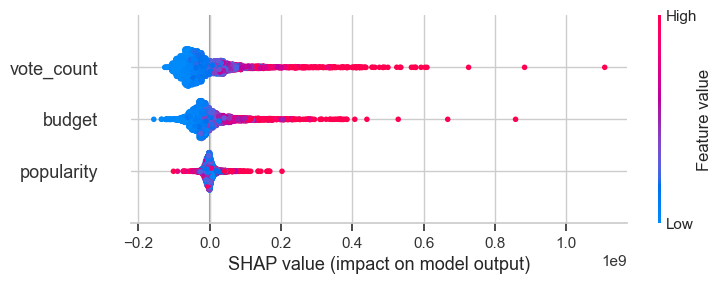

In [159]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
X = df_cleaned1[['vote_count','popularity','budget']]#Features
y = df_cleaned1['revenue']# Target variable

# Handle missing values synchronously(NaN)
X = X[y.notna()]
y = y.dropna()
print("start to train model")
# model training
# Initialize Random Forest Regressor
# random_state=42 ensures reproducibility
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
print("model training completed")
# SHAP explanation
print("start to compute SHAP value")

# Create SHAP explainer object using trained model and feature matrix
# Automatically handles feature distributions and model structure
explainer = shap.Explainer(rf, X)
# Calculate SHAP values for entire dataset
# SHAP values quantify each feature's contribution per sample
shap_values = explainer(X)
print("SHAP computation completed")


# print plots
shap.plots.beeswarm(shap_values)


###  Country Clustering Based on Genre Preferences

####  Business Logic

The goal of this analysis is to identify **which countries share similar preferences in movie genres**, which can support **international market
decisions** such as cross-border distribution strategies, resource allocation, and content localization.

I choose to **cluster countries** instead of genres because genre clustering (e.g., "which genres behave similarly across countries") often lacks
clear business value—especially in our dataset, where the **United States overwhelmingly dominates genre production**
(e.g., over 800 US-produced comedies vs. <10 in most countries). If we clustered genres directly, the results would be skewed by the US, making it
hard to reveal meaningful diversity across the global market.

To mitigate this, the US is **analyzed separately**, while clustering is applied only to **non-US countries**, allowing us to discover more nuanced
patterns, such as regional genre preferences (e.g., Asian countries favoring action films, European countries favoring dramas, etc.).

---

#### Summary of Code and Methodology

1. **Preprocessing**:  
   - Ensured genre values are string type  
   - Created a crosstab of `main_genres` vs. `main_production_countries`  

2. **Transformation**:  
   - Transposed the crosstab so that each row is a country, and each column is a genre  
   - Split the data into `United States of America` and `non-US countries`  

3. **Standardization & Clustering**:  
   - Applied `StandardScaler` to standardize non-US country data  
   - Used `KMeans` with `n_clusters=3` to group similar countries  
   - Assigned the US to its own cluster (Cluster 3) for comparison  

4. **Cluster Profiling**:  
   - Identified the top genres in each cluster using average standardized values  
   - Extracted the top genres for the US using raw production counts  

5. **Visualization**:  
   - Plotted a heatmap of standardized genre data for non-US countries with cluster boundaries  
   - Plotted a second heatmap showing the raw genre counts for the US  

---

This approach reveals **hidden patterns in global film production** that would otherwise be masked by the dominance of the US, offering a more
balanced view of regional market preferences.

---

### Findings

#### ​**1. Non-US Clusters Analysis (Standardized Z-Scores)​**​
- ​**Cluster 0**​ (47 countries: Algeria, Argentina, Mexico, India, etc.):  
  - ​**Strong Preferences**: Western, History, Foreign, TV Movie (high Z-scores in red).  
  - ​**Weak Preferences**: Comedy, Animation (low Z-scores in blue).  
  - ​**Cultural Insights**: Higher preference for ​**historical narratives**​ (e.g., Algeria, India) and ​**foreign films**, possibly reflecting cultural proximity to global/colonial histories.

- ​**Cluster 1**​ (UK):  
  - ​**Unique Profile**: Dominated by TV Movie, Adventure, Crime, War (distinct red/orange cells).  
  - ​**Outlier Behavior**: Isolated from other English-speaking clusters (Cluster 2), suggesting distinct production/consumption patterns.

- ​**Cluster 2**​ (15 countries: Australia, Canada, France, Germany):  
  - ​**Top Genres**: Mystery, Action, Comedy, Horror, Animation (strong red/orange cells).  
  - ​**Hollywood Influence**: High alignment with ​**action/comedy**​ genres, likely driven by US cultural exports and localized adaptations.

---

#### ​**2. US Production vs. Genre Preferences**​
- ​**Production Volume**​ (Raw Counts):  
  - ​**Documentary**​ (801) and ​**Drama**​ (702) dominate production.  
  - ​**Action**​ (475) and ​**Comedy**​ (192) are high-output but not top audience preferences.  
  - ​**Low Output**: Foreign (12), War (1), Family (12) – mismatch with global trends.

- ​**Audience Preferences**​ (Cluster 3/US):  
  - ​**Top Genres**: Comedy, Drama, Action, Adventure, Horror.  
  - ​**Conflict**: Despite producing 475 Action films, it ranks only 4th in audience preference (vs. Comedy/Drama).

---

#### ​**3. Global Genre Patterns**​
- ​**Action Genre**:  
  - ​**High Production**​ in the US (475) and ​**preference**​ in Cluster 2 (non-US English-speaking countries).  
  - ​**Low Preference**​ in Cluster 0 (e.g., Algeria, Mexico) – suggests regional divergence.

- ​**Historical/Western Genres**:  
  - ​**Cluster 0**​ favors Western (red cells) and History (e.g., India, Mexico).  
  - ​**US Avoidance**: Western is absent in US top 5 preferences, despite being a classic American genre.

- ​**Animation & Mystery**:  
  - ​**Cluster 2**​ leads in Animation (France, Japan) and Mystery (Germany).  
  - ​**US Underrepresentation**: Animation ranks low in US production (not in top 5).

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



=== List of Countries by Non-US Cluster ===
Cluster 0: Algeria, Argentina, Austria, Bahamas, Belgium, Brazil, Bulgaria, China, Czech Republic, Denmark, Dominican Republic, Finland, Greece, Hong Kong, Hungary, Iceland, India, Indonesia, Iran, Ireland, Israel, Italy, Jamaica, Japan, Kyrgyz Republic, Lebanon, Luxembourg, Malaysia, Mexico, Netherlands, New Zealand, Norway, Other, Pakistan, Romania, Russia, South Africa, South Korea, Spain, Sweden, Switzerland, Thailand, United Arab Emirates
Cluster 1: United Kingdom
Cluster 2: Australia, Canada, France, Germany, Unknown

=== Top Genres by Non-US Cluster ===
Cluster 0:Top Genres: Western, History, TV Movie, Foreign, Unknown
Cluster 1:Top Genres: TV Movie, Adventure, Music, Crime, War
Cluster 2:Top Genres: Mystery, Action, Comedy, Horror, Animation

=== Top Genres in the US (Cluster 3) ===
Cluster 3 (US) Top Genres: Comedy, Drama, Action, Adventure, Horror


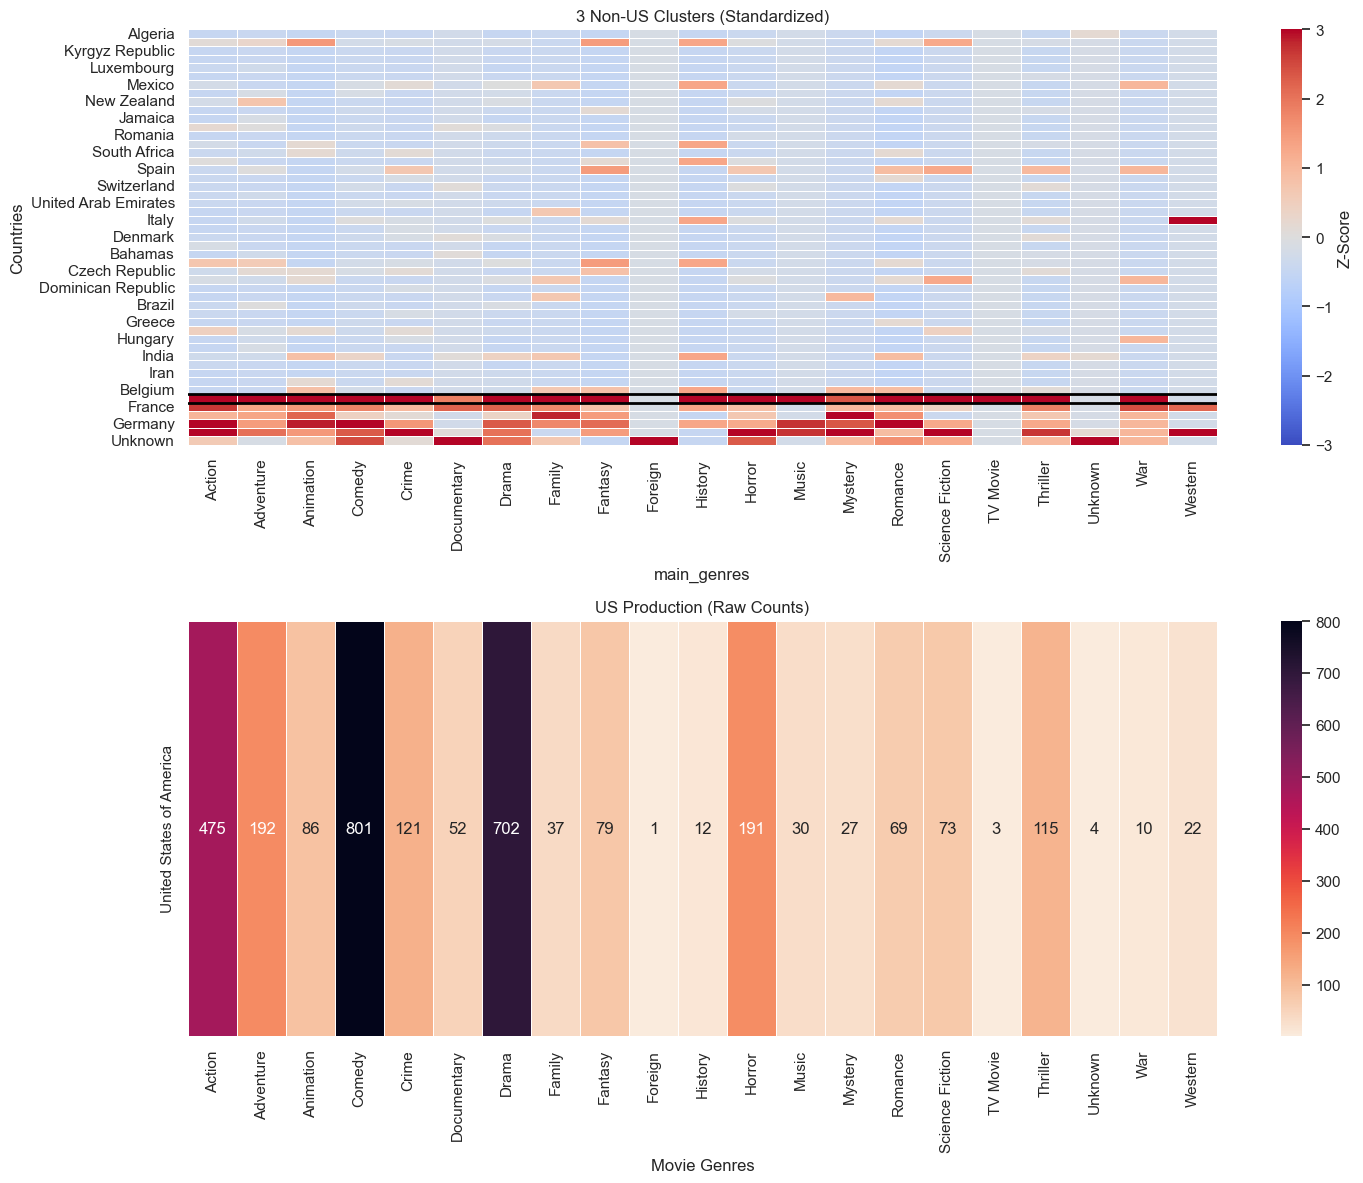

In [166]:



# ----------- Data Preprocessing ------------------------
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure genres are string type
df_cleaned1['main_genres'] = df_cleaned1['main_genres'].astype(str)

# Create a crosstab (rows = genre names, columns = countries)
ct = pd.crosstab(df_cleaned1['main_genres'], df_cleaned1['main_production_countries'])

# Transpose and separate the US
ct_countries = ct.T
us = ct_countries.loc[["United States of America"]]
non_us = ct_countries.drop("United States of America", axis=0)

# Standardize non-US data
scaler = StandardScaler()
non_us_scaled = pd.DataFrame(
    scaler.fit_transform(non_us),
    index=non_us.index,
    columns=non_us.columns   # Keep genre names as column labels, not 01 or 10
)

# Clustering and label assignment
kmeans = KMeans(n_clusters=3, random_state=42)
non_us_clusters = kmeans.fit_predict(non_us_scaled)
non_us["Cluster"] = non_us_clusters
us["Cluster"] = 3    # Assign US to a separate cluster for comparison


# --------------- Analyze Non-US Clusters and Top Genres ------------
# List of countries by cluster
print("\n=== List of Countries by Non-US Cluster ===")
for cluster in [0, 1, 2]:
    countries = non_us[non_us["Cluster"] == cluster].index.tolist()
    print(f"Cluster {cluster}: {', '.join(countries)}")

# Top genres in each cluster
print("\n=== Top Genres by Non-US Cluster ===")
for cluster in [0, 1, 2]:
    cluster_data = non_us_scaled[non_us["Cluster"] == cluster]
    top_genres = cluster_data.mean().sort_values(ascending=False).head(5).index.tolist()
    print(f"Cluster {cluster}:Top Genres: {', '.join(top_genres)}") 

print("\n=== Top Genres in the US (Cluster 3) ===")
us_data = us.drop("Cluster", axis=1)  # Remove cluster label before averaging
us_top_genres = us_data.mean().sort_values(ascending=False).head(5).index.tolist()
print(f"Cluster 3 (US) Top Genres: {', '.join(us_top_genres)}")

# ------------ Visualization ------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Standardized heatmap for non-US countries
non_us_sorted = non_us_scaled.loc[non_us.sort_values("Cluster").index]
sns.heatmap(
    non_us_sorted,
    cmap="coolwarm",
    center=0,
    ax=ax1,
    vmin=-3, vmax=3,
    cbar_kws={"label": "Z-Score"},
    linewidths=0.5
)
ax1.set_title("3 Non-US Clusters (Standardized)")
ax1.set_ylabel("Countries")



# Draw horizontal lines to indicate cluster boundaries
non_us_clusters_sorted = non_us.sort_values("Cluster")["Cluster"]
boundaries = np.where(np.diff(non_us_clusters_sorted) != 0)[0] + 1
for boundary in boundaries:
    ax1.axhline(y=boundary, color="black", linewidth=2)


# Raw production heatmap for the US

sns.heatmap(
    us_data,
    cmap="rocket_r",
    annot=True,
    fmt="d",
    ax=ax2,
    linewidths=0.5
)
ax2.set_title("US Production (Raw Counts)")
ax2.set_xlabel("Movie Genres")
ax2.set_ylabel("")


plt.tight_layout()
plt.show()

### Time Series Decomposition & Structural Interpretation

#### Purpose
This analysis focuses on decomposing and interpreting the structural components of revenue time series data, including trend, seasonality, and residuals. Key objectives are:
1. Identifying underlying patterns through component decomposition
2. Validating time series properties using statistical tests
3. Explaining temporal variations using decomposition results

---

### Analytical Workflow

1. ​**Data Preparation & Initial Exploration**​
  - Clean missing values in trend component
  - Calculate first-order differences for trend analysis

2. ​**Structural Decomposition**​
  - Extract trend, seasonal, and residual components
  - Visualize component interactions (original vs components)
  - Calculate key trend metrics (growth rate, stationarity)

3. ​**Stationarity Verification**​
  - Perform Augmented Dickey-Fuller test
  - Analyze ACF/PACF plots for temporal dependencies

4. ​**Component Analysis**​
  - Investigate seasonal patterns through decomposition
  - Quantify monthly seasonal variations
  - Validate residual characteristics (normality, randomness)

---

### Key Findings & Real-World Implications

#### 1. ​**Daily Increase (Average First-Order Difference)​**​ 
 - ​**Value**: $3,845.70 daily growth (0.0421% daily percentage increase). 
 - ​**Practical Meaning**: 
 - The consistent upward trend suggests movies generate incremental revenue over time, likely driven by ​**word-of-mouth effects**​ (e.g., positive reviews spreading after opening weekends) or ​**delayed ticket purchases**​ (e.g., parents buying tickets for school holidays after initial bookings). 
 - The low percentage growth (0.04%) reflects a mature market where demand stabilizes but doesn’t spike dramatically.

---

#### 2. ​**Stationarity Test on Trend**​ 
 - ​**ADF Statistic**: -3.1709, ​**p-value**: 0.0217. 
 - ​**Practical Meaning**: 
 - The rejection of non-stationarity implies the underlying revenue trend is stable over time, ​**not drifting upward/downward**. 
 - This stability allows studios to predict long-term revenue with confidence, enabling budgeting for annual investments (e.g., marketing campaigns, franchise sequels).

---

#### 3. ​**ARIMA Model Performance**​ 
 - ​**AIC/BIC**: 1,390,612.88 / 1,390,638.41. 
 - ​**Practical Meaning**: 
 - The high AIC/BIC values indicate the model captures major patterns but may miss nuanced factors (e.g., social media trends, platform releases). 
 - Residual skewness (-4.06) and kurtosis (191.97) highlight extreme outliers (e.g., record-breaking blockbusters or box office bombs), emphasizing the need for ​**risk mitigation strategies**​ (e.g., diversified portfolio investments).

---

#### 4. ​**Critical Seasonal Patterns**​ 

 - ​**Peak**: June 1st ($38,004,407.96) coincides with ​**summer blockbuster season**​ (e.g., *Avatar: The Way of Water*), leveraging school holidays and family audiences.
   
 - ​**Trough**: September 10th (-$25,683,429.56) aligns with ​**post-summer slump**​ and back-to-school consumer shifts.
   
 - ​**Secondary Peaks**: July ($26.8M), May ($19.5M), and December ($17.8M) reflect ​**holiday-driven demand**​ (Thanksgiving, Christmas) and awards season marketing.
   
 - ​**Cold Spots**: February (-$20.2M), April (-$11.1M), and March (-$13.4M) correlate with ​**post-holiday budget fatigue**​ and limited new releases.

---

#### 5. ​**Data Table Insights**​ 
 | Month | Seasonal Value ($M) | Key Drivers | 
 |-------|---------------------|-------------| 
 | 1 | -1.5 | Post-holiday slump + limited new content | 
 | 6 | +3.2 | Summer tentpole releases (e.g., Marvel/DC films) | 
 | 9 | -2.2 | End of summer fatigue + school reopening | 
 | 12 | +1.7 | Holiday season + Oscar campaign hype | 

---

#### 6. ​**Actionable Recommendations**​ 
 - ​**Inventory Management**: Increase screenings for June/July blockbusters and reduce capacity in February/April. 
 - ​**Pricing Strategy**: Dynamic pricing during peak months (e.g., premium pricing for IMAX screenings). 
 - ​**Risk Mitigation**: Diversify investments across genres to offset unpredictable box office outcomes (evidenced by residual kurtosis). 
 - ​**Content Planning**: Align release schedules with seasonal trends (e.g., horror films in October, family films in summer).

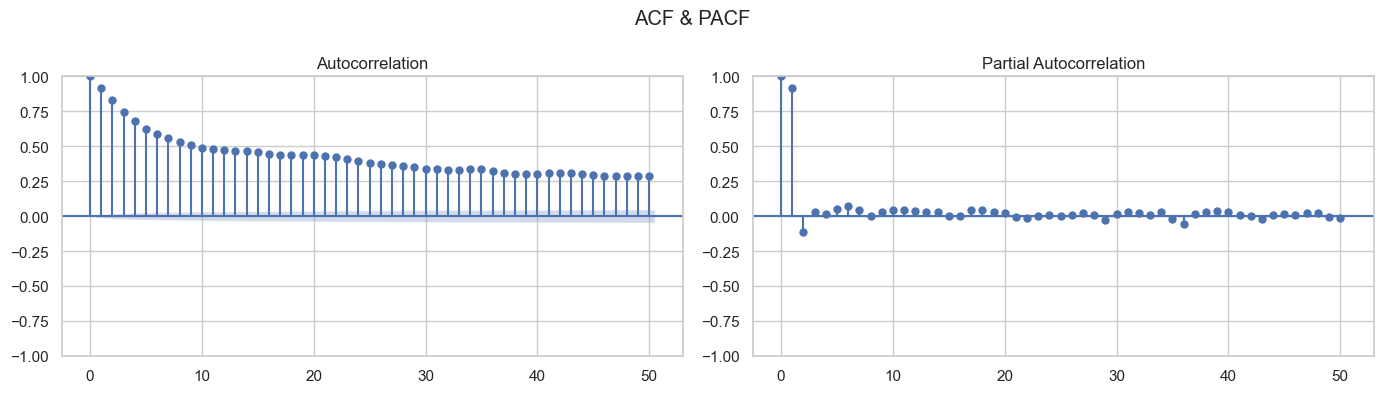

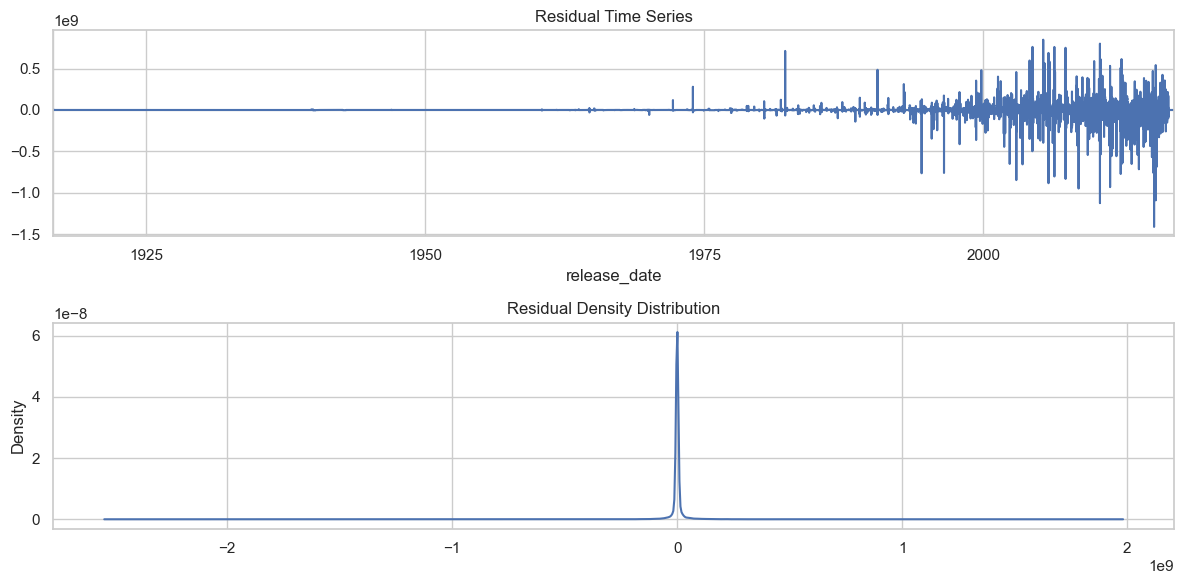

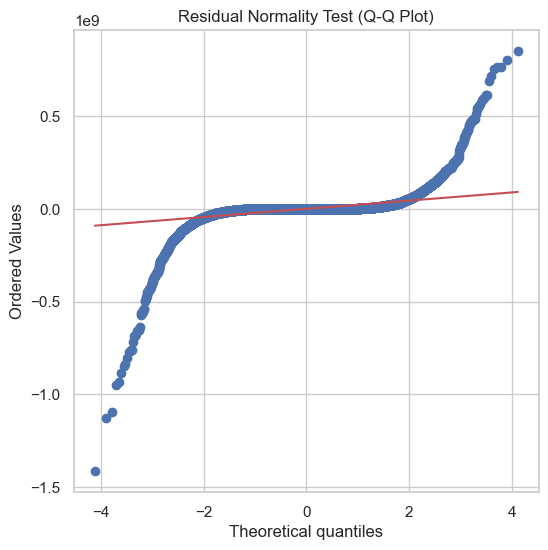


 Summary Report:
1. Daily Increase (Average First-Order Difference）: 3845.6959
   Average Daily Percentage Increase in Trend: 0.0421%
2. Stationarity Test on Trend - ADF Statistic: -3.1709, p值: 0.0217
3. ARIMA Model - AIC: 1390612.88, BIC: 1390638.41
4. Residual Skewness: -4.06, Kurtosis: 191.97, JB Test p-value: 0.0000

 Key Seasonal Points Within the Year:
- Peak：06-01，Average Seasonal Value = 38004407.96
- Trough：09-10，Average Seasonal Value  = -25683429.56


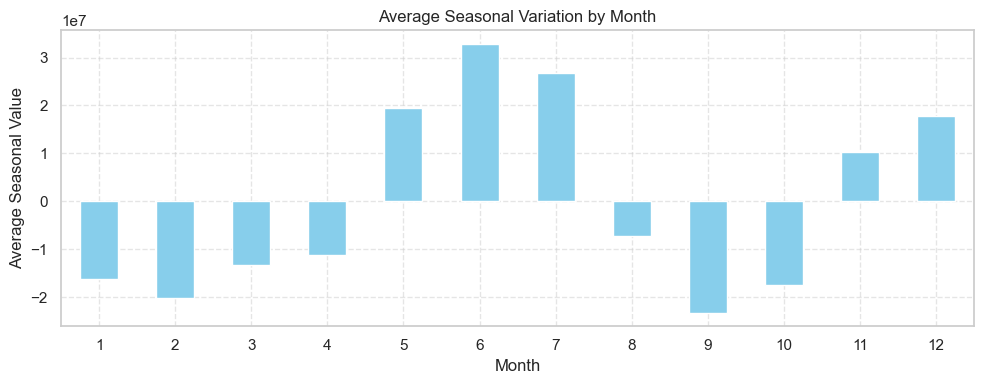


 Average Monthly Seasonal Values (Descending):
release_date
6     32856349.73
7     26837772.16
5     19452291.63
12    17785377.31
11    10343668.70
8     -7287865.31
4    -11119230.80
3    -13367257.72
1    -16188691.56
10   -17541323.33
2    -20228031.32
9    -23242814.19
Name: seasonal, dtype: float64


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from scipy.stats import probplot
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression


# make sure type of `release_date` is datetime
df_cleaned1['release_date'] = pd.to_datetime(df_cleaned1['release_date'])


df_daily = df_cleaned1.groupby('release_date')['revenue'].mean().to_frame()


df_daily = df_daily.asfreq('D')
df_filled = df_daily.interpolate(method='time')


decomposition = seasonal_decompose(df_filled['revenue'], model='additive', period=365)

# --- Trend Analysis ---

# Drop missing values from trend component
trend_series = decomposition.trend.dropna()
# Calculate daily increase (average of adjacent differences)
daily_increase = trend_series.diff().mean()

# Get the first non-null trend value
start_value = trend_series.iloc[0]

# Calculate average daily percentage increase in trend
daily_pct_increase = (daily_increase / start_value) * 100





# --- Stationarity Test on Trend Component ---
result = adfuller(trend_series)
adf_stat = result[0]
adf_p = result[1]

# --- Autocorrelation and Partial Autocorrelation Plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_filled['revenue'], lags=50, ax=axes[0])
plot_pacf(df_filled['revenue'], lags=50, ax=axes[1])
plt.suptitle('ACF & PACF')
plt.tight_layout()
plt.show()

# --- ARIMA Model Fitting ---
model = ARIMA(df_filled['revenue'], order=(1, 1, 1))
results = model.fit()
residuals = results.resid

# --- Residual Analysis ---
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
residuals.plot(title="Residual Time Series", ax=ax[0])
residuals.plot(kind='kde', title='Residual Density Distribution', ax=ax[1])
plt.tight_layout()
plt.show()

# Q-Q Plot for normality check of residuals
plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Residual Normality Test (Q-Q Plot)')
plt.grid(True)
plt.show()

print("\n Summary Report:")
print(f"1. Daily Increase (Average First-Order Difference）: {daily_increase:.4f}")
print(f"   Average Daily Percentage Increase in Trend: {daily_pct_increase:.4f}%")
print(f"2. Stationarity Test on Trend - ADF Statistic: {adf_stat:.4f}, p值: {adf_p:.4f}")
print(f"3. ARIMA Model - AIC: {results.aic:.2f}, BIC: {results.bic:.2f}")
print(f"4. Residual Skewness: {residuals.skew():.2f}, Kurtosis: {residuals.kurtosis():.2f}, JB Test p-value: {stats.jarque_bera(residuals)[1]:.4f}")

# --- Seasonal Component Analysis ---
seasonal = decomposition.seasonal
seasonal_by_day = seasonal.groupby(seasonal.index.dayofyear).mean()
peak_day = seasonal_by_day.idxmax()
trough_day = seasonal_by_day.idxmin()
peak_value = seasonal_by_day.max()
trough_value = seasonal_by_day.min()
peak_date = (datetime(2020, 1, 1) + timedelta(days=int(peak_day) - 1)).strftime('%m-%d')
trough_date = (datetime(2020, 1, 1) + timedelta(days=int(trough_day) - 1)).strftime('%m-%d')

print(f"\n Key Seasonal Points Within the Year:")
print(f"- Peak：{peak_date}，Average Seasonal Value = {peak_value:.2f}")
print(f"- Trough：{trough_date}，Average Seasonal Value  = {trough_value:.2f}")

# --- Average Seasonal Value by Month ---
seasonal_monthly = seasonal.groupby(seasonal.index.month).mean()
plt.figure(figsize=(10, 4))
seasonal_monthly.plot(kind='bar', color='skyblue')
plt.title('Average Seasonal Variation by Month')
plt.xlabel('Month')
plt.ylabel('Average Seasonal Value')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n Average Monthly Seasonal Values (Descending):")
print(seasonal_monthly.sort_values(ascending=False).round(2))





# Conclusion

* This project systematically reveals the key characteristics of the film market through multi-dimensional data analysis. 

* First, there are significant differences in the budget distribution of different types of films: action and science fiction films generally have higher budgets due to special effects and production scale, while documentaries and thrillers have lower and more concentrated budgets, reflecting differences in business strategies and risk management. 

* Second, the box office prediction model constructed based on random forest and SHAP methods shows that the number of votes and budget are the main factors affecting the box office. The model not only has good prediction performance, but also provides quantitative interpretability support. 

* Third, the cluster analysis of the film genre preferences of various countries shows that non-US countries present three main preference groups, focusing on cultural narrative, crime adventure and entertainment genres, while the United States shows a complex structure in which production and preferences are not completely consistent, revealing the regional differentiation characteristics of global viewing preferences. Finally, the box office time series analysis reveals an overall slow upward trend and significant seasonal fluctuations, with obvious box office peaks in the summer and year-end holiday periods, and interactive effects on the performance of different types of films. 

* These findings provide valuable references for film production, distribution and market strategies, and support the industry's scientific decision-making in budget allocation, genre selection and release timing.